# Machine Learning for Time Series Data in Python 

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Machine Learning for Time Series Data in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# CHAPTER 1 - Time Series and Machine Learning Primer
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from glob import glob
import librosa as lr

# CHAPTER 2 - Time Series as Inputs to a Model
from librosa.core import stft, amplitude_to_db
from librosa.display import specshow

# Chapter 3 - Predicting Time Series Data
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from functools import partial

# Chapter 4 - Validating and Inspecting Time Series Models
from sklearn.model_selection import KFold, ShuffleSplit, TimeSeriesSplit
from sklearn.utils import resample


In [4]:
# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1)
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    image = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 4)
    imagem = plt.imread(data_folder + (image4+format_img))
    plt.axis('off')
    plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

##    CHAPTER 1  - Time Series and Machine Learning Primer

#### Exercício 1 - Timeseries kinds and applications

In [5]:
#vídeo

Exercício 2

In [6]:
# Identifying a time series

# Which of the following data sets is not considered time series data?
print("A list of the average length of each class at the school.")

A list of the average length of each class at the school.


Exercício 3

In [7]:
%%script false
# Plotting a time series (I)

# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y='data_values', ax=axs[0])
data2.iloc[:1000].plot(y='data_values', ax=axs[1])
plt.show()

Couldn't find program: 'false'


Exercício 4

In [8]:
%%script false
# Plotting a time series (II)

# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(x='time', y='data_values', ax=axs[0])
data2.iloc[:1000].plot(x='time', y='data_values', ax=axs[1])
plt.show()

Couldn't find program: 'false'


#### Exercício 5 - Machine learning basics

In [9]:
#vídeo

from sklearn.svm import LinearSVC

Exercício 6

In [10]:
# Fitting a simple model: classification

# iris dataset
from sklearn import datasets
iris = datasets.load_iris()
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
data['target'] = iris['target']
#####################################################################################################

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Construct data for the model
X = data[["petal length (cm)", "petal width (cm)"]]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Fit the model
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Exercício 7

[0 0 1 0 2 2 2 0 0 2 1 0 2 2 2 0 1 2 0 0 1 2 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]


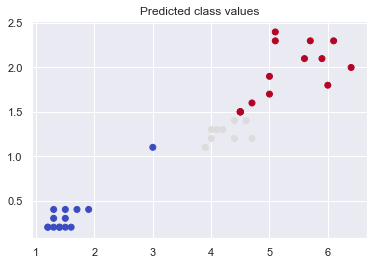

In [11]:
# Predicting using a classification model

# Predict with the model
predictions = model.predict(X_test)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

Exercício 8

In [12]:
# Fitting a simple model: regression

# Boston housing market dataset
from sklearn import datasets
boston = datasets.load_boston()
data = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
#data['target'] = boston['target']
#####################################################################################################

from sklearn import linear_model

# Prepare input and output DataFrames
X = data[["AGE"]]
y = data["RM"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Fit the model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Exercício 9

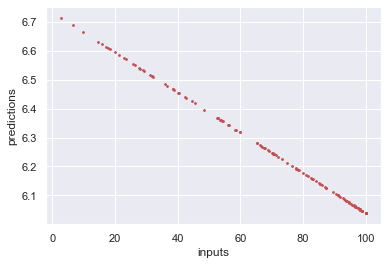

Here the red line shows the relationship that your model found. As the proportion of pre-1940s houses gets larger,
the average number of rooms gets slightly lower.


In [13]:
# Predicting using a regression model

# new inputs for AGE
new_inputs = X_test

# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs)

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()
print("""Here the red line shows the relationship that your model found. As the proportion of pre-1940s houses gets larger,
the average number of rooms gets slightly lower.""")

#### Exercício 10 - Machine learning and time series data

In [14]:
#vídeo

# Loading auditory data
from glob import glob
files = glob('data/heartbeat-sounds/files/*.wav')
print(files)

# Reading in auditory data
import librosa as lr

# `load` accepts a path to an audio file
#audio, sfreq = lr.load('data/heartbeat-sounds/proc/files/murmur__201101051104.wav')
#print(sfreq)

[]


Exercício 11

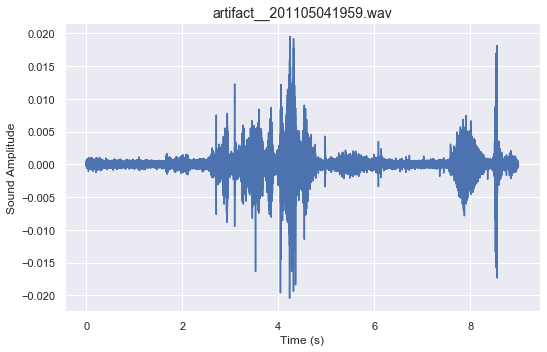

In [15]:
# Inspecting the classification data

import librosa as lr
from glob import glob

# List all the wav files in the folder
audio_files = glob(data_folder + '/*.wav')

# Read in the last audio file, create the time array
audio, sfreq = lr.load(audio_files[2])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.title('artifact__201105041959.wav', fontsize=14)
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 12

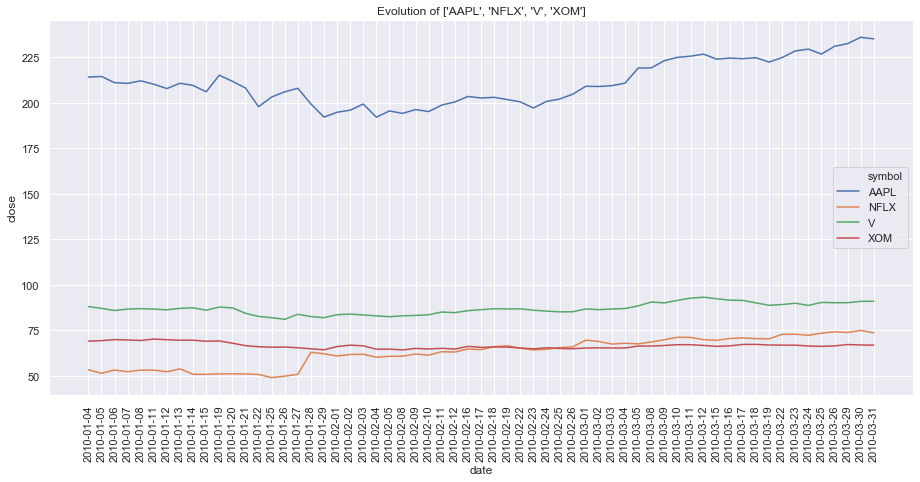

symbol        open       close         low        high       volume
date                                                                          
2010-01-04   AAPL  213.429998  214.009998  212.380001  214.499996  123432400.0
2010-01-04   NFLX   55.519999   53.479999   52.960001   55.730000   17239600.0
2010-01-04      V   88.000000   88.139999   87.459999   88.769997   20180000.0
2010-01-04    XOM   68.720001   69.150002   68.190002   69.260002   27809100.0
2010-01-05   AAPL  214.599998  214.379993  213.249994  215.589994  150476200.0

In [16]:
# Inspecting the regression data (fiz de outra forma)

data = pd.read_csv(data_folder + 'prices.csv', index_col=0)
stocks = ['AAPL', 'NFLX', 'V', 'XOM']

df = data[data['symbol'].isin(stocks)]

# plot
sns.lineplot(x=df.index, y=df['close'], hue=df['symbol'])

plt.title('Evolution of {}'.format(stocks))
plt.xticks(rotation=90)
plt.subplots_adjust(left=0, bottom=-0.3, right=2, top=1, wspace=0, hspace=0)
plt.show()

df.head()

# CHAPTER 2 - Time Series as Inputs to a Model


The easiest way to incorporate time series into your machine learning pipeline is to use them as features in a model. This chapter covers common features that are extracted from time series in order to do machine learning.

#### Exercício 1 - Classifying a time series

In [17]:
%%script false
#vídeo

# Always visualize raw data before fitting models

# What features to use?
# - Using raw timeseries data is too noisy for classication
# - We need to calculate features
# - An easy start: summarize your audio data (min, max, average)

# Fitting a classifier with scikit-learn
# - We've just collapsed a 2-D dataset (samples x time) into several features of a 1-D dataset (samples)
# - We can combine each feature, and use it as an input to a model
# - If we have a label for each sample, we can use scikit-learn to create and fit a classifier

# Note that means are reshaped to work with scikit-learn
X = np.column_stack([means, maxs, stds])
y = labels.reshape([-1, 1])

Couldn't find program: 'false'


Exercício 2

In [18]:
%%script false
# Many repetitions of sounds

def show_plot_and_make_titles():
    axs[0, 0].set(title="Normal Heartbeats")
    axs[0, 1].set(title="Abnormal Heartbeats")
    plt.tight_layout()
    plt.show()   
#############################################################################################

fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(normal.shape[0]) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

Couldn't find program: 'false'


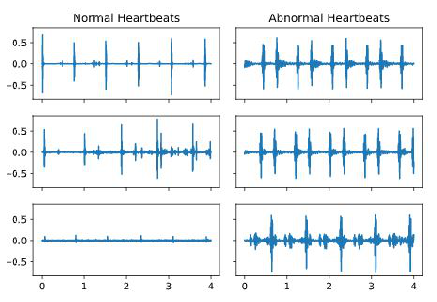

In [19]:
plot_1('normal_abnormal')

Exercício 3

In [20]:
%%script false
# Invariance in time

# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

Couldn't find program: 'false'


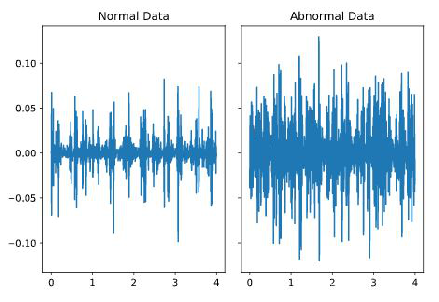

In [21]:
plot_1('normal_abnormal_2')

Exercício 4

In [22]:
%%script false
# Build a classification model

# While eye-balling differences is a useful way to gain an intuition for the data, let's see if you can operationalize 
# things with a model. In this exercise, you will use each repetition as a datapoint, and each moment in time as a feature 
# to fit a classifier that attempts to predict abnormal vs. normal heartbeats using only the raw data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.svm import LinearSVC

# Initialize and fit the model
model = LinearSVC()
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))  # 0.555 (not great), just as randomnly selecting

Couldn't find program: 'false'


#### Exercício 5 - Improving features for classification

The auditory envelope:


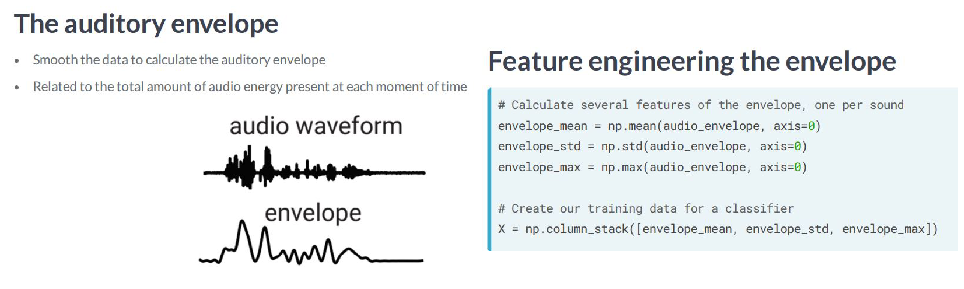

The Tempogram:


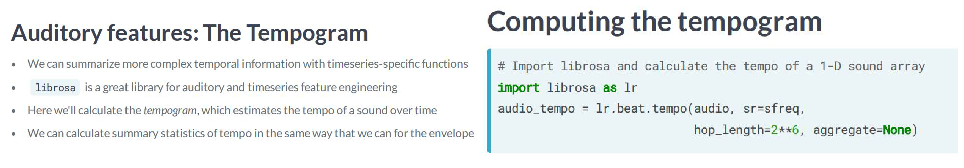

In [23]:
#vídeo

print("The auditory envelope:")
plot_2('auditory_envelope', 'feature_engineering_envelope')

print("The Tempogram:")
plot_2('tempogram', 'computing_tempogram')


Exercício 6

In [24]:
# Calculating the envelope of sound

# One of the ways you can improve the features available to your model is to remove some of the noise present in the data.
# In audio data, a common way to do this is to smooth the data and then rectify it so that the total amount of sound energy
# over time is more distinguishable. You'll do this in the current exercise.
# A heartbeat file is available in the variable audio.

# heartbeat file (sample)
audio = [-0.024684468284249306, -0.06042899191379547, -0.07008005678653717, -0.08421209454536438, -0.08511082828044891, -0.07848527282476425, -0.05943469703197479, -0.03747866675257683, -0.018771115690469742, -0.010868973098695278, -0.016086526215076447, -0.03180798143148422, -0.0508565790951252, -0.0623905323445797, -0.0600249208509922, -0.041530340909957886, -0.01135513000190258, 0.020566709339618683, 0.04139154031872749, 0.045732878148555756, 0.03031333163380623, 0.000978629570454359, -0.03349566087126732, -0.06045594811439514, -0.07026002556085587, -0.057435113936662674, -0.02583434246480465, 0.013586553744971752, 0.04700207710266113, 0.0647946149110794, 0.0625375285744667, 0.043294236063957214, 0.016402283683419228, -0.00868307612836361, -0.022200439125299454, -0.019014179706573486, -0.000997860450297594, 0.0244582612067461, 0.047400809824466705, 0.05967891588807106, 0.0580279603600502, 0.04462957754731178, 0.02568778395652771, 0.008433650247752666, 0.0006667522829957306, 0.00379370991140604, 0.015396383590996265, 0.03087756037712097, 0.044830113649368286, 0.052820902317762375, 0.05311933532357216, 0.047233179211616516, 0.03875600919127464, 0.03383124619722366, 0.03618435561656952, 0.04468270391225815, 0.05306793749332428, 0.0578421950340271, 0.057674311101436615, 0.049020376056432724, 0.03422344848513603, 0.020509276539087296, 0.012781359255313873, 0.013500703498721123, 0.023185133934020996, 0.04001108929514885, 0.05735884606838226, 0.06794419139623642, 0.06772567331790924, 0.05785612016916275, 0.042570341378450394, 0.027355600148439407, 0.017501646652817726, 0.01678466610610485, 0.02479371801018715, 0.03540591150522232, 0.04417155310511589, 0.04761357232928276, 0.04265168309211731, 0.029369229450821877, 0.012974315322935581, -0.0005317047471180558, -0.0070977527648210526, -0.004956603050231934, 0.004462278913706541, 0.016493555158376694, 0.025616860017180443, 0.027368266135454178, 0.020313121378421783, 0.006744732614606619,-0.009938105009496212, -0.02323918603360653, -0.028521576896309853, -0.025199346244335175, -0.014624020084738731, -0.000571981247048825, 0.009868930093944073, 0.012043973430991173, 0.004699494689702988, -0.012543116696178913, -0.03523457422852516, -0.05665375292301178, -0.07268556952476501, -0.0789647325873375, -0.07469288259744644, -0.06379126757383347, -0.04934060946106911, -0.03628777340054512, -0.025840619578957558, -0.019870702177286148, -0.018883295357227325, -0.02118823304772377, -0.02649580128490925, -0.03197770193219185, -0.03586309403181076, -0.038945522159338, -0.04338952153921127, -0.046110283583402634, -0.045839108526706696, -0.04216977208852768, -0.03375891596078873, -0.02056913822889328, -0.0066878898069262505, 0.0023223108146339655, 0.0040258439257740974, -0.005728359334170818, -0.022169888019561768, -0.038760848343372345, -0.05166365206241608, -0.05508954077959061, -0.047592632472515106, -0.030337324365973473, -0.006801035720854998, 0.01618802174925804, 0.031445834785699844, 0.03407226875424385, 0.02517528086900711, 0.008545992895960808, -0.011185873299837112, -0.027710597962141037, -0.03673061355948448, -0.03477752208709717, -0.02336818538606167, -0.005443693604320288, 0.01565445587038994, 0.03502405434846878, 0.05008649453520775, 0.057772278785705566, 0.05774252861738205, 0.052237458527088165, 0.04404455050826073, 0.03461411967873573, 0.026222383603453636, 0.0206155925989151, 0.01724052056670189, 0.017409633845090866, 0.022146379575133324, 0.029724936932325363, 0.03917655348777771, 0.04843746870756149, 0.05421198904514313, 0.054765958338975906, 0.04954364150762558, 0.04058321937918663, 0.029811818152666092, 0.0217617005109787, 0.019671833142638206, 0.02393488399684429, 0.03346851468086243, 0.04375636205077171, 0.04893183335661888, 0.044495709240436554, 0.031750671565532684, 0.015118936076760292, -0.00033151410752907395, -0.010055319406092167, -0.013092048466205597, -0.009025157429277897, -2.317867438250687e-05, 0.009538398124277592, 0.015064384788274765, 0.013974407687783241, 0.007368811406195164, -0.0036717208568006754, -0.014121830463409424, -0.018824055790901184, -0.01702188327908516, -0.010512246750295162, -0.0011226802598685026, 0.007460242602974176, 0.010883084498345852, 0.008329080417752266, -0.0007223674328997731, -0.015454147011041641, -0.029950739815831184, -0.04116206616163254, -0.04502590000629425, -0.03947624936699867, -0.028410740196704865, -0.013707184232771397,-0.0011106833117082715, 0.004759874660521746, 0.0018348874291405082, -0.00940434169024229, -0.026069993153214455, -0.04295257106423378, -0.056604739278554916, -0.06375891715288162,-0.06258007884025574,-.05514097586274147, -0.04478943720459938, -0.03503873571753502, -0.027290333062410355, -0.02281554788351059, -0.020259207114577293, -0.01790442131459713, -0.015627063810825348,-0.013400662690401077, -0.011583290062844753, -0.012552750296890736, -0.01571190543472767, -0.020777078345417976, -0.025714430958032608, -0.026902588084340096, -0.02256164327263832, -0.012365139089524746, 0.0011579371057450771, 0.01321855653077364, 0.020770279690623283, 0.020047977566719055, 0.00986378826200962, -0.0035769410897046328, -0.015069695189595222, -0.020540937781333923,0.01736730895936489, -0.004317427985370159, 0.014812230132520199, 0.032587505877017975, 0.04354572668671608, 0.044267892837524414, 0.03440290689468384, 0.01928780972957611, 0.005178398918360472, -0.0023862887173891068, -0.0015778912929818034, 0.007261086720973253, 0.02040790021419525, 0.033180542290210724, 0.04509151726961136, 0.05280493572354317, 0.05519711971282959, 0.053137488663196564, 0.048395298421382904, 0.04416808858513832, 0.04189639538526535, 0.039847347885370255, 0.038173068314790726, 0.03563488647341728, 0.03253738209605217, 0.03047661855816841, 0.02836405485868454, 0.0286231879144907, 0.03188297152519226, 0.03631431609392166, 0.04152803495526314, 0.045318253338336945, 0.04431105777621269, 0.0393296480178833, 0.029955634847283363, 0.019483590498566628, 0.010628816671669483, 0.005145831033587456, 0.00565841281786561, 0.011017804965376854, 0.020380128175020218, 0.030055388808250427, 0.03733456879854202, 0.03980154171586037, 0.03402595967054367, 0.02116462029516697, 0.0069419206120073795, -0.005847068969160318, -0.0137257669121027, -0.013748354278504848, -0.0072606392204761505, 0.002152165398001671, 0.011220565997064114, 0.017826177179813385, 0.018993843346834183, 0.01483907550573349, 0.006708650849759579, -0.0019197415094822645, -0.008905848488211632, -0.0142144113779068, -0.016028795391321182, -0.014570686966180801, -0.011459186673164368, -0.00776214525103569, -0.005361445713788271, -0.004961397964507341, -0.005528882145881653, -0.006870734971016645, -0.010306858457624912, -0.015833240002393723, -0.022627849131822586, -0.030901726335287094, -0.0380735918879509, -0.042582686990499496, -0.04406444728374481, -0.041462406516075134, -0.03561604395508766, -0.027006519958376884, -0.018649540841579437, -0.013827519491314888, -0.011989411897957325, -0.014932530000805855, -0.023274129256606102, -0.03225283324718475, -0.038159433752298355, -0.03907572850584984, -0.03516425937414169, -0.02763674035668373, -0.018517697229981422, -0.010885347612202168, -0.006314083933830261,-0.006449813023209572, -0.010849704965949059, -0.016231350600719452, -0.0212327241897583, -0.023569641634821892, -0.02164383977651596, -0.01793782040476799, -0.01350944023579359, -0.008641188964247704, -0.005182584282010794, -0.0029885279946029186, -0.0018801153637468815, -0.002011503791436553, -0.0039997221902012825, -0.006885417737066746, -0.0074448795057833195, -0.006952720228582621, -0.00471355440095067, -0.001390123157761991, 0.002598067279905081, 0.007058892399072647,0.010308651253581047, 0.012394542805850506, 0.012235276401042938, 0.012619111686944962, 0.01359793171286583, 0.014396199025213718, 0.016640465706586838, 0.01957736536860466, 0.02226036787033081, 0.02396484836935997, 0.024831075221300125, 0.024887392297387123, 0.024289671331644058, 0.024234872311353683, 0.024219604209065437, 0.02354196459054947, 0.02323123998939991, 0.0244457945227623, 0.026337677612900734, 0.028065737336874008, 0.03074435517191887, 0.033509511500597, 0.03570668399333954, 0.0366179421544075, 0.03576887026429176,0.03330517187714577, 0.03000587224960327, 0.02677770145237446, 0.023531533777713776, 0.021987391635775566, 0.02071971446275711, 0.01974913850426674, 0.020164787769317627, 0.021510934457182884, 0.02293437346816063, 0.02250269614160061, 0.019800305366516113, 0.016297096386551857, 0.013931394554674625, 0.011798672378063202, 0.010076477192342281, 0.010111629962921143, 0.011513741686940193, 0.013097588904201984, 0.014393466524779797, 0.014317197725176811, 0.012113235890865326, 0.008487205021083355, 0.003394371597096324, -0.002491855062544346, -0.006686580367386341, -0.00802666787058115, -0.00840673130005598, -0.008726810105144978, -0.008784615434706211, -0.010297749191522598, -0.013467162847518921,-0.015289435163140297, -0.016937976703047752, -0.018648143857717514, -0.019620267674326897, -0.02122100070118904, -0.02271544374525547, -0.023150304332375526, -0.02203175611793995, -0.02105431631207466, -0.020501231774687767, -0.019240738824009895, -0.017173077911138535, -0.015597887337207794, -0.0145705696195364, -0.013247126713395119, -0.013302735053002834, -0.01395030040293932, -0.013636820018291473, -0.014273107051849365, -0.015722516924142838, -0.016531040892004967, -0.016146067529916763, -0.015400362201035023, -0.015876341611146927, -0.01581900380551815, -0.015163415111601353, -0.016072316095232964, -0.01884925365447998, -0.022005265578627586, -0.025340164080262184, -0.0283943023532629, -0.029836077243089676, -0.030607519671320915, -0.03118087351322174, -0.029920309782028198, -0.02677028439939022, -0.023040734231472015, -0.020050952211022377, -0.019068652763962746, -0.017935816198587418, -0.01618841290473938, -0.013880855403840542, -0.011533564887940884, -0.008397568017244339, -0.003550170687958598, 0.001008922583423555, 0.003274048212915659, 0.0030687893740832806, 0.002864125184714794, 0.0019220252288505435, 0.0008894617785699666, 0.0010749927023425698, 0.001404495327733457, 0.0014513455098494887, 0.0018690639408305287, 0.0017170477658510208, 0.0005028869491070509, -0.001143756089732051, -0.002005981048569083, -0.001862571109086275, -0.0010911986464634538, 0.0005749163683503866, 0.0005600319127552211, -5.506336947291857e-06, 0.0006743735284544528, 0.0002047382586169988, 0.0002795695618260652, 0.0006928104558028281, 3.198495687684044e-05, -0.0009107652585953474, -0.0021564257331192493, -0.001061521004885435, 0.00021088052017148584, 0.0017850379226729274, 0.003036793088540435, 0.003972329664975405, 0.004350587259978056, 0.002302345121279359, 0.0007187812007032335, -0.0008686575456522405, -0.0017915248172357678, -0.00268820789642632, -0.002577009378001094, -0.0011001687962561846, -0.0008294067811220884, -0.0013319568242877722, -0.0008033007034100592, 0.0012365446891635656, 0.0037545785307884216, 0.004725071135908365, 0.005197172053158283, 0.004169621504843235, 0.0019691509660333395, 0.0011549292830750346, 0.0006773911882191896, 0.0008320172200910747, 0.00018928447389043868,0.0008687411900609732, 0.0016798216383904219, 0.000300009036436677, -0.0017659950535744429, -0.0037476953584700823, -0.005600620061159134, -0.006853748112916946, -0.005243251100182533, -0.004305304028093815, -0.0059125907719135284, -0.00864267349243164, -0.01156251598149538, -0.013218393549323082, -0.014510969631373882, -0.014298321679234505, -0.014156229794025421, -0.01519038062542677, -0.014658021740615368, -0.01322498545050621, -0.011358517222106457, -0.009611738845705986, -0.007173521444201469, -0.0038408502005040646, -0.0014025717973709106,0.00024253599985968322, 0.0003364441217854619, 0.0007048858096823096, 0.0025427709333598614, 0.004330211319029331, 0.0059898667968809605, 0.007246481254696846, 0.008855332620441914, 0.008979357779026031, 0.006428051739931107, 0.0050336457788944244, 0.004087198060005903, 0.0018112852703779936, 0.0002347568515688181, -0.0002550180070102215, 0.0001827535597840324, 0.0003181788488291204, 0.0007126455311663449, 0.0027005779556930065, 0.0039643156342208385, 0.004747402388602495, 0.005513645708560944, 0.005774227436631918, 0.005721597000956535, 0.005143569316715002, 0.006208529230207205, 0.00848353374749422, 0.01004756148904562, 0.011587027460336685, 0.012389024719595909, 0.012750851921737194, 0.01251976191997528, 0.011049320921301842, 0.009797350503504276, 0.009153039194643497, 0.009830656461417675, 0.009589491412043571, 0.008888411335647106, 0.009068084880709648, 0.00803527981042862, 0.006962341256439686, 0.00644983584061265, 0.00568659882992506, 0.004736198112368584, 0.005754415411502123, 0.007940017618238926, 0.009252946823835373, 0.009133698418736458, 0.008389713242650032, 0.008041860535740852, 0.007191788870841265, 0.006342087872326374, 0.00548343313857913, 0.0035225749015808105, 0.002289361087605357, 0.0032124475110322237, 0.0037420312874019146, 0.003799010068178177, 0.00361958728171885, 0.0032889661379158497, 0.001529485802166164, -0.00013051296991761774, -0.0005208609509281814, -0.0008662967011332512, 0.0004143210535403341, 0.0013578684302046895, 0.001521606114692986, 0.0005513712530955672, -0.0005551992799155414, -0.0023675214033573866, -0.004140086937695742, -0.004490443039685488, -0.0056169056333601475, -0.006173313595354557, -0.006280588451772928, -0.006192523054778576, -0.0060291294939816, -0.006470050197094679, -0.0077913557179272175, -0.00960787758231163, -0.010189106687903404, -0.009910760447382927, -0.00861910916864872, -0.006939626298844814, -0.007041120436042547, -0.007347144652158022, -0.006519558373838663, -0.005640878342092037, -0.005450357683002949, -0.004915560130029917, -0.005173454061150551, -0.006533028092235327, -0.00801020860671997, -0.009713368490338326, -0.009931209497153759, -0.008662107400596142, -0.007898258045315742, -0.007364234421402216, -0.006779384333640337, -0.006952382158488035, -0.007018493488430977, -0.006265281233936548, -0.005115161649882793, -0.004211026709526777, -0.003829470369964838, -0.003278265241533518, -0.002658132929354906, -0.003724937094375491, -0.0035552536137402058, -0.002745739184319973, -0.002734919311478734, -0.0026005576364696026, -0.0039393100887537, -0.004814249463379383, -0.0056718457490205765, -0.006741449702531099, -0.006939359474927187, -0.007443622220307589, -0.007191035896539688, -0.005683776456862688, -0.003899403614923358, -0.0022456084843724966, -0.0010850674007087946, -9.714951738715172e-05, 0.0013066671090200543, 0.002457596594467759, 0.00288098375312984, 0.0029957075603306293, 0.002320055151358247, 0.0014775230083614588, 0.0005397540517151356, -0.0002648330118972808, -0.00022095897293183953, -1.3405756362772081e-05, 0.00022380007430911064, 0.0008228716906160116, 0.0015225025126710534, 0.0013215250801295042, 0.0006843553273938596, 0.0011496554361656308, 0.001435396377928555, 0.0016404441557824612, 0.002675931202247739, 0.002724866382777691, 0.002865042071789503, 0.004110667854547501, 0.005228381138294935, 0.005542606581002474, 0.005123160779476166, 0.0060967132449150085, 0.0072001926600933075, 0.006264594383537769, 0.005266191903501749, 0.0042417049407958984, 0.0033563401084393263, 0.002788349287584424, 0.0029496352653950453, 0.00299670547246933, 0.002559279790148139, 0.0032274082768708467, 0.0047635543160140514, 0.006136602256447077, 0.005800733342766762, 0.005125613883137703, 0.0056901127099990845, 0.0063085658475756645, 0.005671846214681864, 0.004742809571325779, 0.0036463593132793903, 0.0029359948821365833, 0.0031237152870744467, 0.003412279300391674, 0.003560122800990939, 0.004253116901963949, 0.005745457485318184, 0.005690619349479675, 0.004763612989336252, 0.004234919790178537, 0.003816939890384674, 0.0036507071927189827, 0.0022605815902352333, -0.00015426149184349924, -0.001231946749612689, -0.0014765403466299176, -0.0010254888329654932, -0.0003964414063375443, -0.0003578929463401437, -0.00017489399760961533, -0.0010245180455967784, -0.003305636113509536, -0.005195497069507837, -0.005828144494444132, -0.006398581434041262, -0.006528210826218128, -0.006136118434369564, -0.005202528554946184, -0.004464882891625166, -0.004345546010881662, -0.004612131975591183, -0.005638041067868471, -0.005712825804948807, -0.004779933951795101, -0.0036847759038209915, -0.0029373844154179096, -0.0025061918422579765, -0.0012566307559609413, -0.0005764802917838097, -0.0010091110598295927, -0.002189717488363385, -0.004866305738687515, -0.007870412431657314, -0.010928607545793056, -0.014382008463144302, -0.017632432281970978, -0.019912216812372208, -0.021314600482583046, -0.021496890112757683, -0.020486654713749886,-0.01895223930478096, -0.017254067584872246, -0.015615771524608135, -0.012775587849318981, -0.009159536100924015, -0.006143688224256039, -0.0027974138502031565, 0.00014340058260131627, 0.001433796831406653, 0.002015270758420229, 0.0029717914294451475, 0.00376066192984581, 0.004125645849853754, 0.005196332465857267, 0.006137109827250242, 0.007555899675935507, 0.007647814229130745, 0.006378309801220894, 0.005882214289158583, 0.005405035801231861, 0.00509529048576951, 0.0038882673252373934, 0.002370287897065282, 0.0010077914921566844, 0.0007362619508057833, 0.00036954073584638536, -0.0009411974460817873, -0.0021639063488692045, -0.003333768807351589, -0.004891646094620228, -0.007040708791464567, -0.008376635611057281, -0.010254434309899807, -0.011797964572906494, -0.012088210321962833, -0.011373263783752918, -0.008920112624764442, -0.005379819311201572, -0.0014795439783483744, 0.0011211002711206675, 0.0018824934959411621, 0.002730757463723421, 0.003531360998749733, 0.0038845762610435486, 0.0043950751423835754, 0.0038804304786026478, 0.004302047658711672, 0.006448318716138601, 0.006975761614739895, 0.006779497489333153, 0.007737901993095875, 0.008294359780848026, 0.008408148773014545, 0.009138855151832104, 0.009118162095546722, 0.0074499244801700115, 0.004946125205606222, 0.0028269945178180933, 0.0009733593906275928, -0.001003592973574996, -0.0020317796152085066, -0.0025262453127652407, -0.0026470341254025698, -0.0019770751241594553, -0.0012660325737670064, 0.00018943383474834263, 0.0015002923319116235, 0.0024299228098243475, 0.003274445654824376, 0.0024404970463365316, -0.0003530482645146549, -0.004864103626459837, -0.008614124730229378, -0.01069884654134512, -0.010914048179984093, -0.00983916874974966, -0.008155244402587414, -0.006017617415636778, -0.00393044576048851, -0.002640558872371912, -0.0025999939534813166, -0.002529834397137165, -0.0025684053543955088, -0.0014838037313893437, 0.0010738034034147859, 0.00347084179520607, 0.004834020044654608, 0.006064143963158131, 0.00727979838848114, 0.00779969384893775, 0.007196381222456694, 0.005809484515339136, 0.004024968482553959, 0.0007305071339942515, -0.0026324677746742964, -0.004160142969340086, -0.0044671944342553616, -0.004375163000077009, -0.003823164151981473, -0.003985638730227947, -0.004684022627770901, -0.005474803503602743, -0.005234229378402233, -0.004225588403642178, -0.003584539983421564, -0.0018309629522264004, 0.00019982906815130264, 0.0017454433254897594, 0.0025427897926419973, 0.0018733959877863526, 0.0012036667903885245, 0.0012118687154725194, -0.0011126721510663629, -0.004319322295486927, -0.005640089977532625, -0.006399696227163076, -0.006086092907935381, -0.004195446148514748, -0.0010840182658284903, 0.0025962097570300102, 0.00595673406496644, 0.008325349539518356, 0.009083427488803864, 0.00764026353135705, 0.0046483478508889675, 0.0018951465608552098, 0.00026383233489468694, 6.754014611942694e-05, 0.00047947707935236394, 0.0016136092599481344, 0.00185470562428236, -8.05401723482646e-05, -0.0020504905842244625, -0.0033029653131961823, -0.00451995711773634, -0.005213196389377117, -0.004345497582107782, -0.0013474109582602978, 0.00365843391045928, 0.010108351707458496, 0.017507754266262054, 0.024019381031394005, 0.029058514162898064, 0.031890690326690674, 0.03034755401313305, 0.025153502821922302, 0.01741836592555046, 0.008972587063908577, 0.0007512941956520081, -0.009634601883590221, -0.02094818465411663, -0.03247327730059624, -0.044871676713228226, -0.05543911084532738, -0.06250537186861038, -0.06662636995315552, -0.06855593621730804, -0.06775958091020584, -0.06386950612068176, -0.058175668120384216, -0.05176909640431404, -0.04488380253314972, -0.037842556834220886, -0.028702789917588234, -0.014671375043690205, 0.004279546905308962, 0.02921445481479168, 0.05998023599386215, 0.0946502611041069, 0.13027755916118622, 0.16195537149906158, 0.18401415646076202, 0.19109484553337097, 0.18126271665096283, 0.15456649661064148, 0.11440236121416092, 0.06587947905063629, 0.014386811293661594, -0.03375009447336197, -0.07546348869800568, -0.1113331988453865, -0.14164261519908905, -0.16600826382637024, -0.18398937582969666, -0.1973198652267456, -0.20524896681308746, -0.20656906068325043, -0.20242640376091003, -0.19152821600437164, -0.17471298575401306, -0.15367481112480164, -0.1296670287847519, -0.10303917527198792, -0.07542052119970322, -0.0510551854968071, -0.03424502909183502, -0.024100109934806824, -0.019032547250390053, -0.015918424353003502, -0.008278596214950085, 0.008616487495601177, 0.04156775027513504, 0.09164926409721375, 0.15433301031589508, 0.22533933818340302, 0.2969772517681122, 0.3597431182861328, 0.4089414179325104, 0.441175252199173, 0.45628970861434937, 0.45772767066955566, 0.4508080780506134, 0.4414193630218506, 0.43126189708709717, 0.41813740134239197, 0.39822712540626526, 0.3685229420661926, 0.3232859969139099, 0.2638280689716339, 0.1939939707517624, 0.11868318170309067, 0.046442918479442596, -0.015145432204008102, -0.06151747703552246, -0.09344512969255447, -0.11426190286874771, -0.13178397715091705, -0.15388505160808563, -0.18803544342517853, -0.23728013038635254, -0.3002794682979584, -0.3716961145401001, -0.44241464138031006, -0.5037379860877991, -0.5484533905982971, -0.5747166872024536, -0.583229124546051, -0.5780316591262817, -0.5660802721977234, -0.5518242120742798, -0.5369962453842163, -0.5194662809371948, -0.4954955577850342, -0.4611717462539673, -0.4127599000930786, -0.35019803047180176, -0.2762182354927063, -0.1957985758781433, -0.11529777199029922, -0.03977694734930992, 0.026128454133868217, 0.0819873958826065, 0.12943828105926514, 0.17083807289600372, 0.21058395504951477, 0.24966377019882202, 0.28866130113601685, 0.3287203311920166]
audio_data = {'audio': audio, 'time':np.arange(0, 1, 1/len(audio))}
df_audio = pd.DataFrame(data=audio_data, index=audio_data['time']).drop('time', axis=1)
df_audio.head()


audio
0.000 -0.024684
0.001 -0.060429
0.002 -0.070080
0.003 -0.084212
0.004 -0.085111

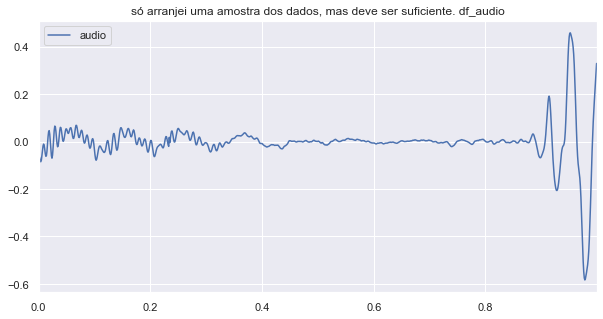

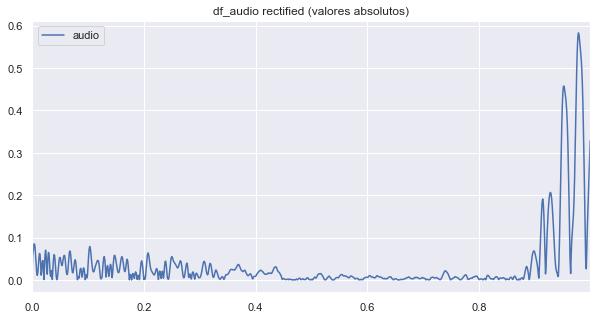

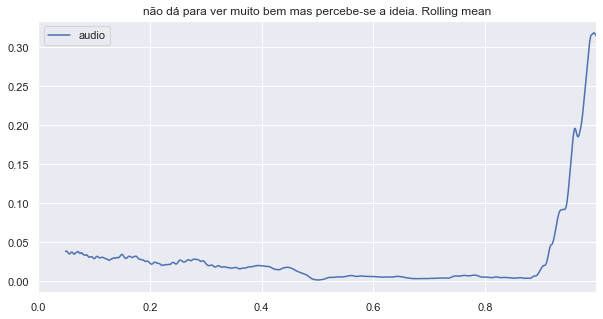

In [25]:
# Plot the raw data first
df_audio.plot(figsize=(10, 5))
plt.title('só arranjei uma amostra dos dados, mas deve ser suficiente. df_audio')

#######################################################

# Rectify the audio signal
audio_rectified = df_audio.apply(np.abs)

# Plot the result
audio_rectified.plot(figsize=(10, 5))
plt.title('df_audio rectified (valores absolutos)')
plt.show()

#######################################################

# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.title('não dá para ver muito bem mas percebe-se a ideia. Rolling mean')
plt.show()

Exercício 7

In [26]:
%%script false
# Calculating features from the envelope

# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
from sklearn.model_selection import cross_val_score
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))  # 0.7166666667

#  This model is both simpler (only 3 features) and more understandable (features are simple summary statistics of 
#the data).

Couldn't find program: 'false'


Exercício 8

In [27]:
%%script false
# Derivative features: The tempogram

# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():   # audio é a df com 60 colunas
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))

# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

########################################################################

# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score)) # 0.516666666667

#  Note that your predictive power may not have gone up (because this dataset is quite small), but you now have a more rich
# feature representation of audio that your model can use.

Couldn't find program: 'false'


#### Exercício 9 - The spectrogram

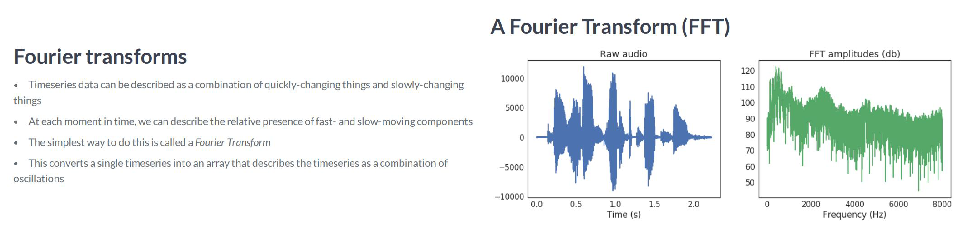

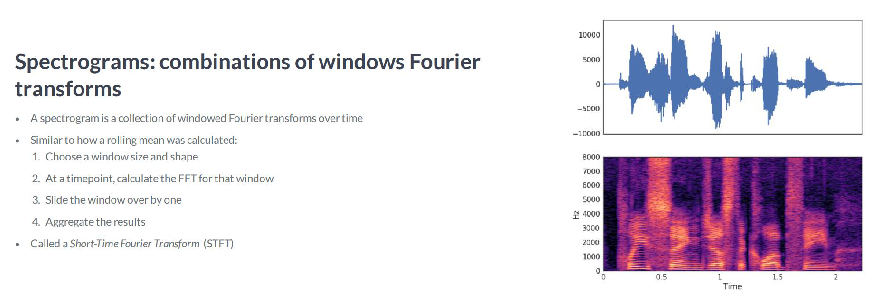

C:\Users\Admin\Anaconda3\lib\site-packages\librosa\core\spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


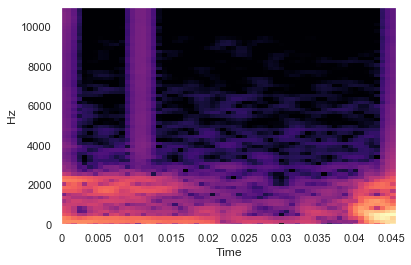

In [28]:
#vídeo

plot_2('fourier_transforms', 'fft')
plot_2('spectrograms', 'spec_2')

# Calculating the STFT
#  - We can calculate the STFT with librosa
#  - There are several parameters we can tweak (such as window size)
#  - For our purposes, we'll convert into decibels which normalizes the average values of all frequencies
#  - We can then visualize it with the specshow() function

# Import the functions we'll use for the STFT
from librosa.core import stft, amplitude_to_db
from librosa.display import specshow

# Calculate our STFT (Short-Time Fourier Transform)
HOP_LENGTH = 2**4
SIZE_WINDOW = 2**7
audio_spec = stft(np.array(audio), hop_length=HOP_LENGTH, n_fft=SIZE_WINDOW)

# Convert into decibels for visualization
spec_db = amplitude_to_db(audio_spec)

# Visualize
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
plt.show()

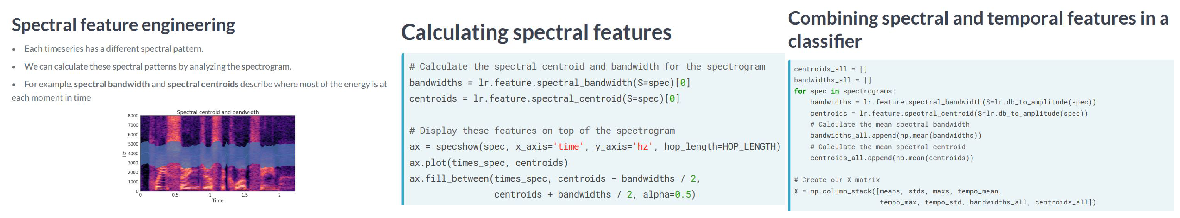

In [29]:
plot_3('spec_feature_engineering', 'spec_3', 'spec_4')

Exercício 10

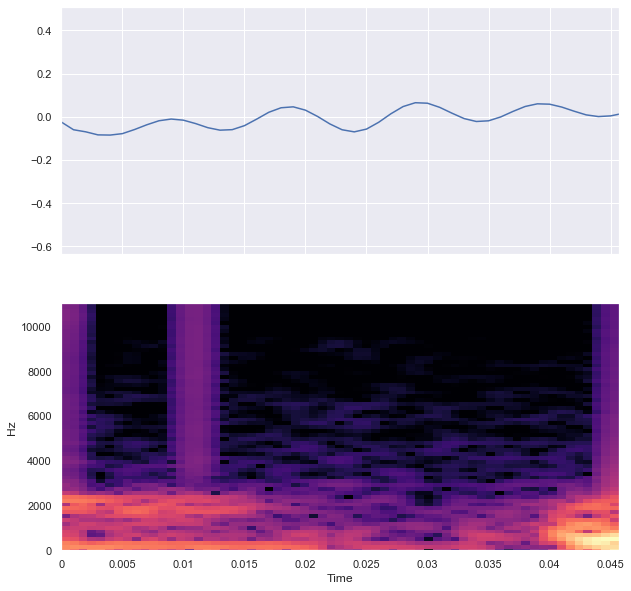

In [30]:
# Spectrograms of heartbeat audio

# Spectral engineering is one of the most common techniques in machine learning for time series data. The first step in this
# process is to calculate a spectrogram of sound. This describes what spectral content (e.g., low and high pitches) are 
# present in the sound over time. In this exercise, you'll calculate a spectrogram of a heartbeat audio file.
# We've loaded a single heartbeat sound in the variable audio.

audio = np.array(audio)
time = np.arange(0, 1, 1/len(audio))

# Import the stft function
from librosa.core import stft

# Prepare the STFT
HOP_LENGTH = 2**4
spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7)

from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert into decibels
spec_db = amplitude_to_db(spec)

# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time, audio)

specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
plt.show()

Exercício 11

In [31]:
# Engineering spectral features

import librosa as lr

# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=np.abs(spec.astype(float)))[0]  # troquei complexo para real (float) + np.abs
centroids = lr.feature.spectral_centroid(S=np.abs(spec.astype(float)))[0]   # troquei complexo para real (float) + np.abs

#############################################################

from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

# Display these features on top of the spectrogram
# fig, ax = plt.subplots(figsize=(10, 5))
# ax = specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
# ax.plot(time, centroids)
# ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
# ax.set(ylim=[None, 6000])
# plt.show()

print("""The spectral centroid and bandwidth characterize the spectral content in each sound over time. They give us a 
summary of the spectral content that we can use in a classifier.""")

The spectral centroid and bandwidth characterize the spectral content in each sound over time. They give us a 
summary of the spectral content that we can use in a classifier.


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


Exercício 12

In [32]:
%%script false
# Combining many features in a classifier

# You've spent this lesson engineering many features from the audio data - some contain information about how the audio 
# changes in time, others contain information about the spectral content that is present.

# The beauty of machine learning is that it can handle all of these features at the same time. If there is different 
# information present in each feature, it should improve the classifier's ability to distinguish the types of audio. Note
# that this often requires more advanced techniques such as regularization, which we'll cover in the next chapter.

# For the final exercise in the chapter, we've loaded many of the features that you calculated before. Combine all of them
# into an array that can be fed into the classifier, and see how it does.

# Loop through each spectrogram
bandwidths = []
centroids = []

for spec in spectrograms:
    # Calculate the mean spectral bandwidth
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
    # Calculate the mean spectral centroid
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
    # Collect the values
    bandwidths.append(this_mean_bandwidth)  
    centroids.append(this_mean_centroid)

###################

# Create X and y arrays
X = np.column_stack([means, stds, maxs, tempo_mean, tempo_max, tempo_std, bandwidths, centroids])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score)) # 0.5333

Couldn't find program: 'false'


In [33]:
print("""You calculated many different features of the audio, and combined each of them under the assumption that they 
provide independent information that can be used in classification. You may have noticed that the accuracy of your models
varied a lot when using different set of features. This chapter was focused on creating new "features" from raw data and
not obtaining the best accuracy. To improve the accuracy, you want to find the right features that provide relevant 
information and also build models on much larger data.""")

You calculated many different features of the audio, and combined each of them under the assumption that they 
provide independent information that can be used in classification. You may have noticed that the accuracy of your models
varied a lot when using different set of features. This chapter was focused on creating new "features" from raw data and
not obtaining the best accuracy. To improve the accuracy, you want to find the right features that provide relevant 
information and also build models on much larger data.


# Chapter 3 - Predicting Time Series Data

If you want to predict patterns from data over time, there are special considerations to take in how you choose and construct your model. This chapter covers how to gain insights into the data before fitting your model, as well as best-practices in using predictive modeling for time series data

#### Exercício 1 - Predicting data over time

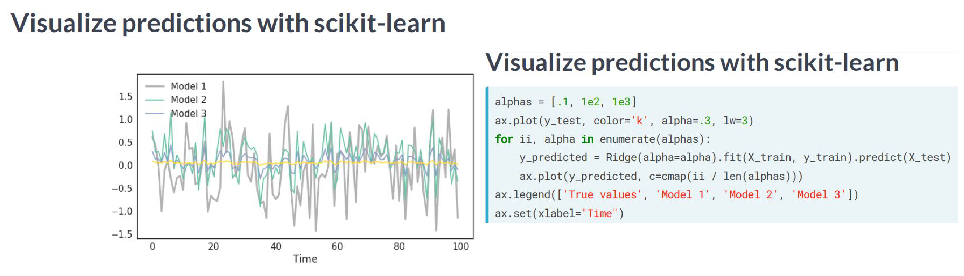

In [34]:
#vídeo

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

plot_2('visualize_predictions' ,'visualize_predictions_2')

Exercício 2

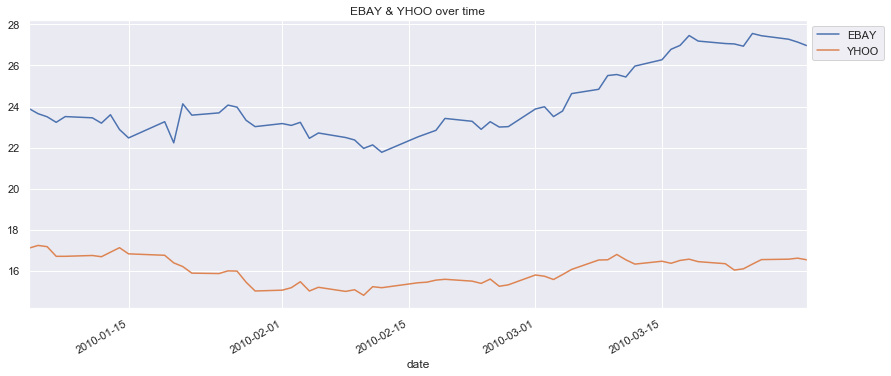

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.


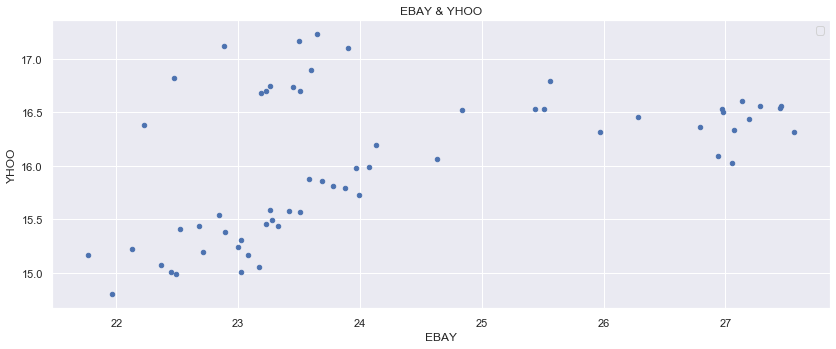

No handles with labels found to put in legend.


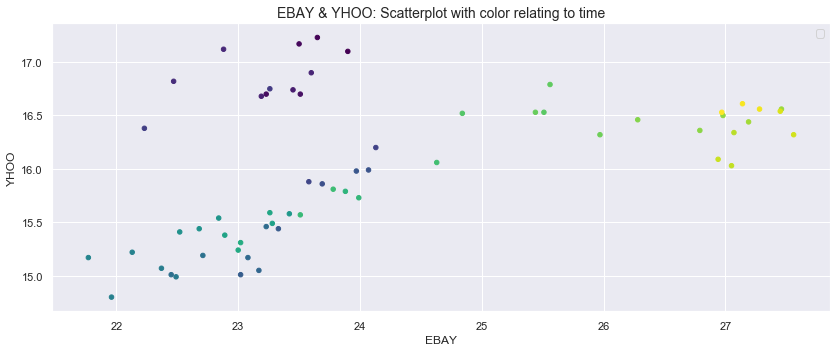

In [35]:
# Introducing the dataset

prices = pd.read_csv(data_folder + 'prices.csv', index_col=0)
prices = prices[prices.symbol.isin(['EBAY', 'YHOO'])]
prices['date'] = pd.to_datetime(prices.index)
prices = prices.pivot(index='date', columns='symbol', values='close')
#####################################################################################

# Plot the raw values over time
prices.plot()
plt.legend(bbox_to_anchor=(1, 1))
plt.title('{} over time'.format(prices.columns[0]+" & "+prices.columns[1]))
plt.subplots_adjust(left=0, bottom=0, right=1.8, top=1, wspace=0, hspace=0)
plt.show()

##########################

# Scatterplot with one company per axis
prices.plot.scatter('EBAY', 'YHOO')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('{}'.format(prices.columns[0]+" & "+prices.columns[1]))
plt.subplots_adjust(left=0, bottom=0, right=1.8, top=1, wspace=0, hspace=0)
plt.show()

##########################

# Scatterplot with color relating to time
prices.plot.scatter('EBAY', 'YHOO', c=prices.index, cmap=plt.cm.viridis, colorbar=False)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('{}: Scatterplot with color relating to time'.format(prices.columns[0]+" & "+prices.columns[1]), fontsize=14)

plt.subplots_adjust(left=0, bottom=0, right=1.8, top=1, wspace=0, hspace=0)
plt.show()

Exercício 3

In [36]:
# Fitting a simple regression model

all_prices = pd.read_csv(data_folder + 'prices.csv', index_col=0).dropna()  # vou tirar os nan's para o efeito
#all_prices = all_prices[all_prices.symbol.isin(['XRX', 'YHOO'])]
all_prices['date'] = pd.to_datetime(all_prices.index)
all_prices = all_prices.pivot(index='date', columns='symbol', values='close')
#####################################################################################

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = all_prices[["EBAY", "NVDA", "YHOO"]].dropna()
y = all_prices[["AAPL"]].dropna()

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)
print("""As you can see, fitting a model with raw data doesn't give great results.""")

[ 0.13272271  0.23933165 -3.55241148]
As you can see, fitting a model with raw data doesn't give great results.


Exercício 4

Score (R2): -0.24925815341202529


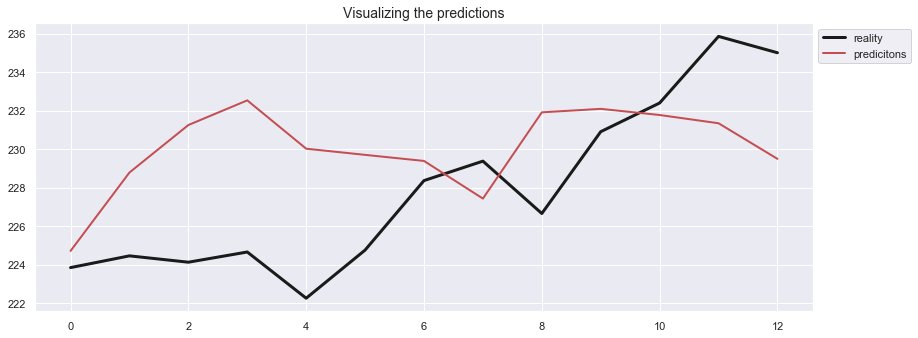

Now you have an explanation for your poor score. The predictions clearly deviate from the true time series values.



In [37]:
# Visualizing predicted values

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print("Score (R2):", score)

###############################

# Visualize our predictions along with the "true" values, and print the score
plt.plot(np.array(y_test), color='k', lw=3)
plt.plot(predictions, color='r', lw=2)
plt.title('Visualizing the predictions', fontsize=14)
plt.legend(['reality', 'predicitons'], bbox_to_anchor=(1, 1))
plt.subplots_adjust(left=0, bottom=0, right=1.8, top=1, wspace=0, hspace=0)
plt.show()
print("""Now you have an explanation for your poor score. The predictions clearly deviate from the true time series values.
""")

#### Exercício 5 - Advanced Time Series prediction

(Linear) Interpolation:


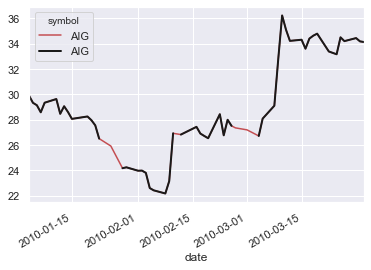

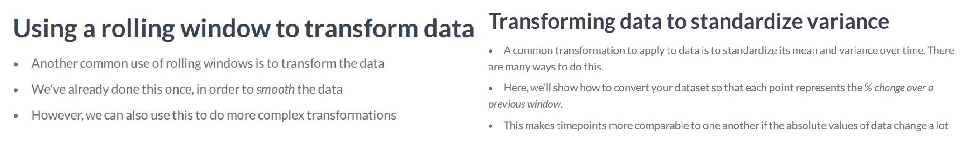

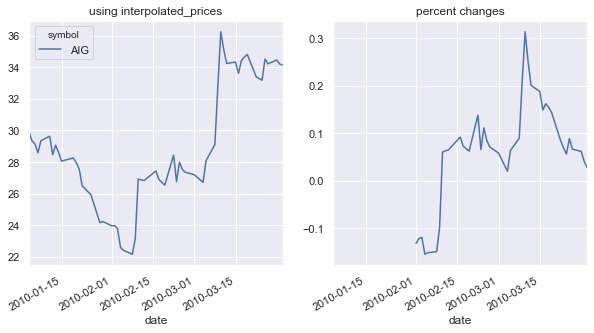

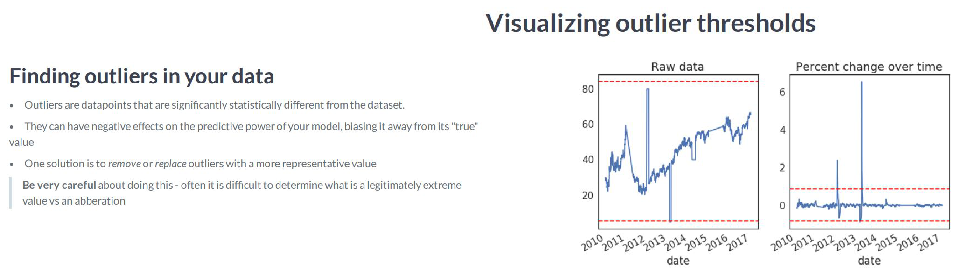

In [38]:
#vídeo

all_prices = pd.read_csv(data_folder + 'prices.csv', index_col=0)
all_prices = all_prices[all_prices.symbol.isin(['AIG'])]
all_prices['date'] = pd.to_datetime(all_prices.index)
all_prices = all_prices.pivot(index='date', columns='symbol', values='close')
all_prices[(all_prices['AIG'] >= 24.4) & (all_prices['AIG'] < 26.5)] = np.nan  # generate nan's
####################################################################################################

# messy data
# - Interpolationn: using time to fill in missing data

# Interpolation in Pandas
print("(Linear) Interpolation:")

# Return a boolean that notes where missing values are
missing = all_prices.isna()

# Interpolate linearly within missing windows
prices_interp = all_prices.interpolate('linear')

# Plot the interpolated data in red and the data w/ missing values in black
ax = prices_interp.plot(c='r')
all_prices.plot(c='k', ax=ax, lw=2)
plt.show()

print("=====================================================================================================")
#####################################################################################################

plot_2('rolling_window', 'transforming_variance', bottom=-0.8)

#Transforming to percent change with Pandas
def percent_change(values):
    """Calculates the % change between the last value and the mean of previous values"""
    # Separate the last value and all previous values into variables
    previous_values = values[:-1]
    last_value = values[-1]
    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change


# Applying this to our data

# Plot the raw data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax = prices_interp.plot(ax=axs[0], title='using interpolated_prices')

# Calculate % change and plot
ax = prices_interp.rolling(window=20).aggregate(percent_change).plot(ax=axs[1], title='percent changes')
ax.legend_.set_visible(False)
plt.show()

print("=====================================================================================================")
#######################################################################################################
plot_2('finding_outliers', 'visualizing_threshold')

In [39]:
%%script false
# Plotting a threshold on our data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for data, ax in zip([prices_interp, prices_interp.rolling(window=20).aggregate(percent_change)], axs):
    # Calculate the mean / standard deviation for the data
    this_mean = data.mean()
    this_std = data.std()
    # Plot the data, with a window that is 3 standard deviations around the mean
    data.plot(ax=ax)
    ax.axhline(this_mean + this_std * 3, ls='--', c='r')
    ax.axhline(this_mean - this_std * 3, ls='--', c='r')

Couldn't find program: 'false'


In [40]:
%%script false
# Replacing outliers using the threshold

# Center the data so the mean is 0
prices_outlier_centered = prices_outlier_perc - prices_outlier_perc.mean()

# Calculate standard deviation
std = prices_outlier_perc.std()

# Use the absolute value of each datapoint to make it easier to find outliers
outliers = np.abs(prices_outlier_centered) > (std * 3)

# Replace outliers with the median value
# We'll use np.nanmean since there may be nans around the outliers
prices_outlier_fixed = prices_outlier_centered.copy()
prices_outlier_fixed[outliers] = np.nanmedian(prices_outlier_fixed)

Couldn't find program: 'false'


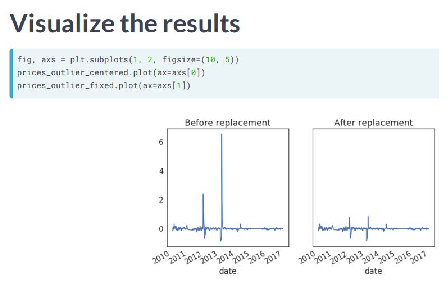

In [41]:
plot_1('visualize_results_outlier')

Exercício 6

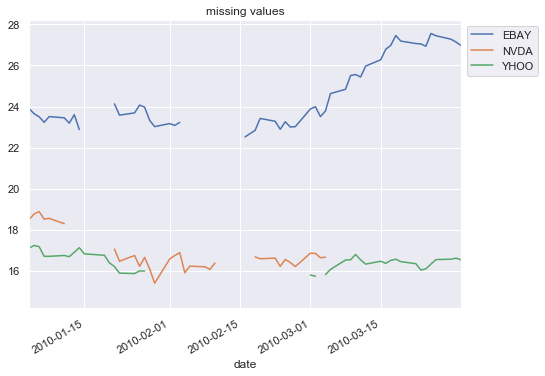

symbol
EBAY     8
NVDA    27
YHOO    20
dtype: int64


In [42]:
# Visualizing messy data

prices = pd.read_csv(data_folder + 'prices.csv', index_col=0)
prices = prices[prices.symbol.isin(['EBAY', 'NVDA', 'YHOO'])]
prices['date'] = pd.to_datetime(prices.index)
prices = prices.pivot(index='date', columns='symbol', values='close')
prices['EBAY'][(prices['EBAY'] >= 21.1) & (prices['EBAY'] < 22.5)] = np.nan  # generate nan's
prices['NVDA'][(prices['NVDA'] >= 17.1) & (prices['NVDA'] < 18.1)] = np.nan  # generate nan's
prices['YHOO'][(prices['YHOO'] >= 15) & (prices['YHOO'] < 15.7)] = np.nan  # generate nan's
#####################################################################################

# Visualize the dataset
prices.plot()
plt.legend(bbox_to_anchor=(1, 1))
plt.title('missing values')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Count the missing values of each time series
missing_values = prices.isna().sum()
print(missing_values)


Exercício 7

In [43]:
# Imputing missing values

# When you have missing data points, how can you fill them in?
# In this exercise, you'll practice using different interpolation methods to fill in some missing values, visualizing the
# result each time. But first, you will create the function (interpolate_and_plot()) you'll use to interpolate missing data 
# points and plot them.

# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()


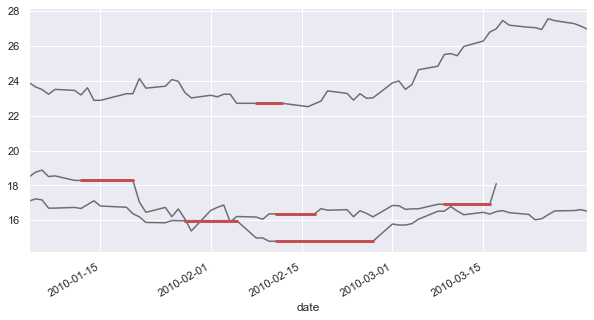

In [44]:
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

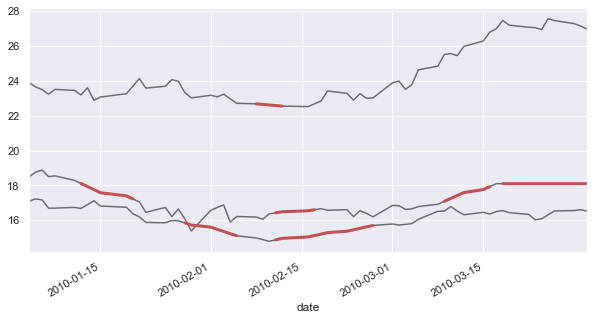

In [45]:
# Interpolate linearly
interpolation_type = 'linear'
interpolate_and_plot(prices, interpolation_type)

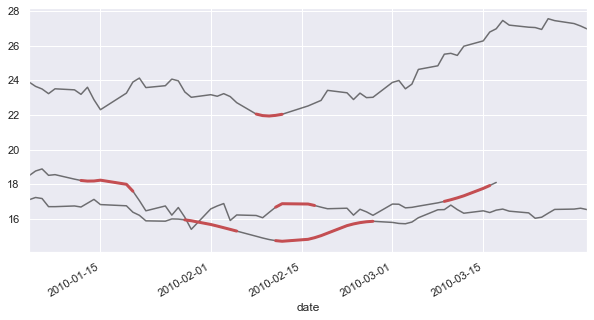

In [46]:
# Interpolate with a quadratic function
interpolation_type = 'quadratic'
interpolate_and_plot(prices, interpolation_type)

In [47]:
print("""When you interpolate, the pre-existing data is used to infer the values of missing data.
The method you use for this has a big effect on the outcome.""")

When you interpolate, the pre-existing data is used to infer the values of missing data.
The method you use for this has a big effect on the outcome.


Exercício 8

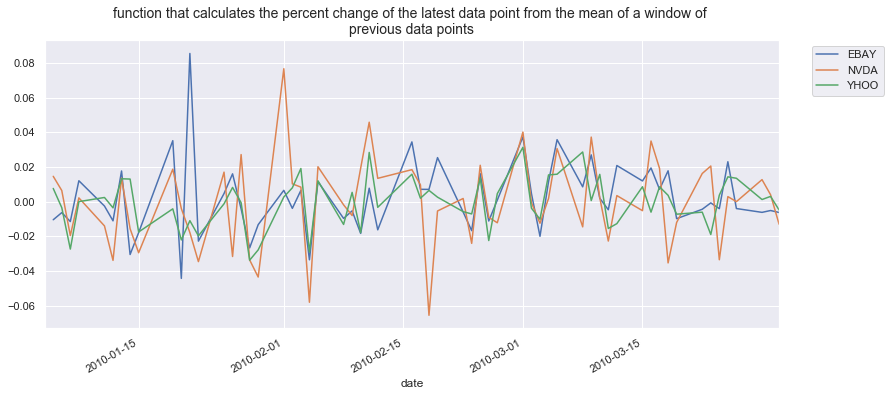

In [48]:
# Transforming raw data

prices = pd.read_csv(data_folder + 'prices.csv', index_col=0)
prices = prices[prices.symbol.isin(['EBAY', 'NVDA', 'YHOO'])]
prices['date'] = pd.to_datetime(prices.index)
prices = prices.pivot(index='date', columns='symbol', values='close')

# In the last chapter, you calculated the rolling mean. In this exercise, you will define a function that calculates the
# percent change of the latest data point from the mean of a window of previous data points. This function will help you 
# calculate the percent change over a rolling window.
# This is a more stable kind of time series that is often useful in machine learning.

# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
prices_perc = prices.rolling(2).aggregate(percent_change)
prices_perc.loc["2010-01":"2010-04"].plot()
plt.legend(bbox_to_anchor=(1.15, 1))
plt.title("""function that calculates the percent change of the latest data point from the mean of a window of 
previous data points""", fontsize=14)
plt.subplots_adjust(left=0, bottom=0, right=1.7, top=1, wspace=0, hspace=0)
plt.show()


Exercício 9

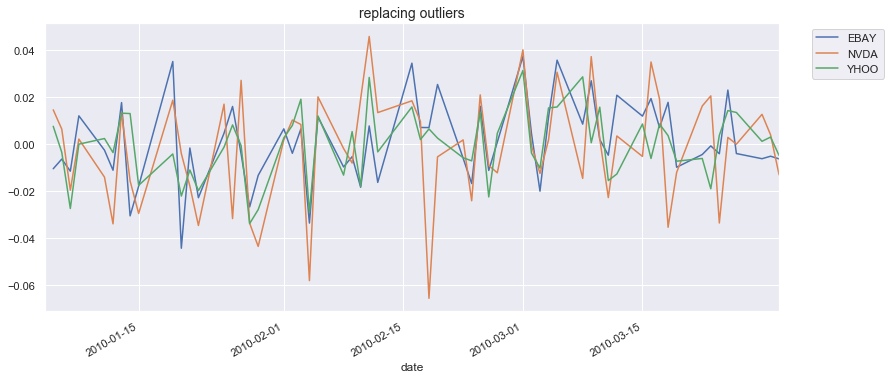

In [49]:
# Handling outliers

def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.plot()

plt.legend(bbox_to_anchor=(1.15, 1))
plt.title("""replacing outliers""", fontsize=14)
plt.subplots_adjust(left=0, bottom=0, right=1.7, top=1, wspace=0, hspace=0)
plt.show()


#### Exercício 10 - Creating features over time

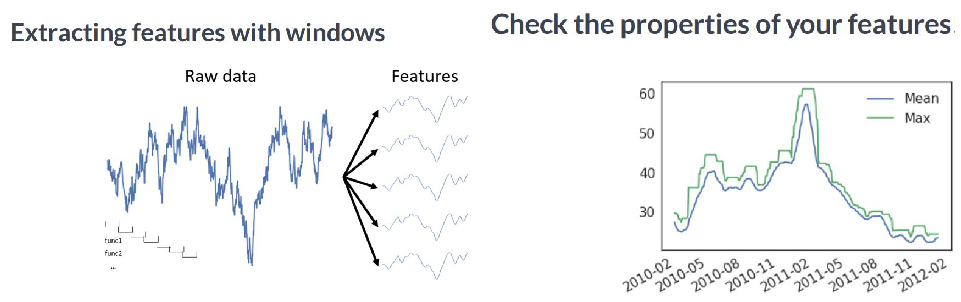

symbol       EBAY       NVDA   YHOO
date                               
2010-01-04  23.90  18.490000  17.10
2010-01-05  23.65  18.760000  17.23
2010-01-06  23.50  18.879999  17.17 

                EBAY             NVDA                 YHOO       
                 std   amax       std       amax       std   amax
date                                                             
2010-01-15  0.414590  23.90  0.573566  18.879999  0.218082  17.23
2010-01-19  0.364576  23.65  0.606890  18.879999  0.213305  17.23
2010-01-20  0.464658  23.60  0.592362  18.879999  0.227655  17.17 

[[0 1 2]
 [0 1 2]
 [0 1 2]]
mean:  1.0
mean_over_first_axis (axis=0):  [0. 1. 2.]

computing percentiles:  40.0 

[functools.partial(<function percentile at 0x00000213CE6DB378>, q=20), functools.partial(<function percentile at 0x00000213CE6DB378>, q=40), functools.partial(<function percentile at 0x00000213CE6DB378>, q=60)] 

[20.0, 40.00000000000001, 60.0]


In [50]:
#vídeo

plot_2('extracting_features', 'check_properties')

# Using .aggregate for feature extraction

# Visualize the raw data
print(prices.head(3), "\n")

# Calculate a rolling window, then extract two features
feats = prices.rolling(10).aggregate([np.std, np.max]).dropna()
print(feats.head(3), "\n")

####################################################################################

# Using partial() in Python

# If we just take the mean, it returns a single value
a = np.array([[0, 1, 2], [0, 1, 2], [0, 1, 2]])
print(a)
print("mean: ", np.mean(a))

# We can use the partial function to initialize np.mean with an axis parameter
from functools import partial
mean_over_first_axis = partial(np.mean, axis=0)
print("mean_over_first_axis (axis=0): ", mean_over_first_axis(a))

###################################################################################

# Percentiles summarize your data

# Percentiles are a useful way to get more ne-grained summaries of your data (as opposed to using np.mean )
# For a given dataset, the Nth percentile is the value where N% ofthe data is below that datapoint, and 100-N% of the
# data is above that datapoint.
print("\ncomputing percentiles: ", np.percentile(np.linspace(0, 200), q=20), "\n")

# Combining np.percentile() with partial functions to calculate a range of percentiles
data = np.linspace(0, 100)

# Create a list of functions using a list comprehension
percentile_funcs = [partial(np.percentile, q=ii) for ii in [20, 40, 60]]
print(percentile_funcs, "\n")

# Calculate the output of each function in the same way
percentiles = [i_func(data) for i_func in percentile_funcs]
print(percentiles)

# Calculate multiple percentiles of a rolling window  ----> data.rolling(20).aggregate(percentiles)

############################################################################################

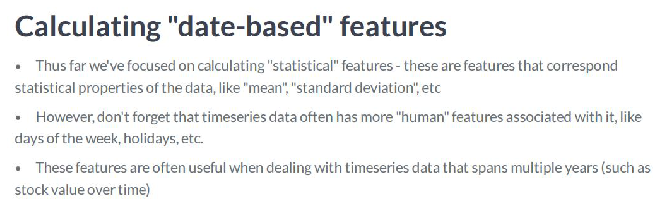

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype='int64', name='date') 

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object', name='date')


In [51]:
plot_1('date_based_features', right=1.5)

# datetime features using Pandas

# Ensure our index is datetime
prices.index = pd.to_datetime(prices.index)

# Extract datetime features
day_of_week_num = prices.index.weekday
print(day_of_week_num[:10], "\n")

day_of_week = prices.index.weekday_name
print(day_of_week[:10])

Exercício 11

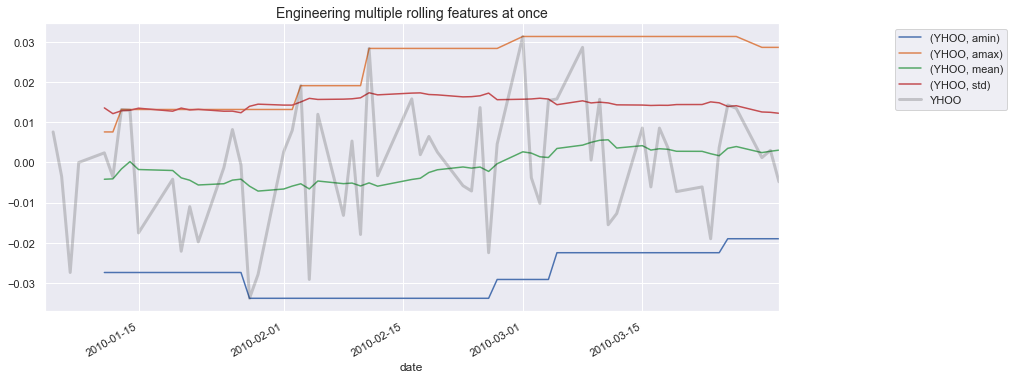

In [52]:
# Engineering multiple rolling features at once

prices = pd.read_csv(data_folder + 'prices.csv', index_col=0)
prices = prices[prices.symbol.isin(['YHOO'])]
prices['date'] = pd.to_datetime(prices.index)
prices = prices.pivot(index='date', columns='symbol', values='close')
prices_perc = prices.rolling(2).aggregate(percent_change)

# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.plot()
prices_perc.plot(ax=ax, color='k', alpha=.2, lw=3)

plt.legend(bbox_to_anchor=(1.15, 1))
plt.title("""Engineering multiple rolling features at once""", fontsize=14)
plt.subplots_adjust(left=0, bottom=0, right=1.7, top=1, wspace=0, hspace=0)
plt.show()


Exercício 12

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


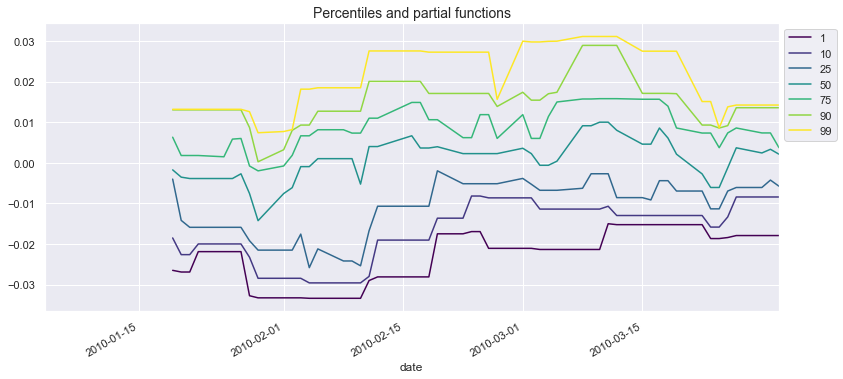

In [53]:
# Percentiles and partial functions

# Import partial from functools
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc.rolling(10, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)


features_percentiles.columns = features_percentiles.columns.droplevel()  # tive que fazer isto para tirar 1 nível
                                                                         # do MultiIndex (neste caso, YHOO)
    

# Plot a subset of the result
features_percentiles.plot(cmap=plt.cm.viridis)

plt.legend(percentiles, bbox_to_anchor=(1, 1))
plt.title("""Percentiles and partial functions""", fontsize=14)
plt.subplots_adjust(left=0, bottom=0, right=1.7, top=1, wspace=0, hspace=0)
plt.show()


Exercício 13

In [54]:
# Using "date" information

# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.weekday
prices_perc['week_of_year'] = prices_perc.index.weekofyear
prices_perc['month_of_year'] = prices_perc.index.month

prices_perc.head(10)


symbol          YHOO  day_of_week  week_of_year  month_of_year
date                                                          
2010-01-04       NaN            0             1              1
2010-01-05  0.007602            1             1              1
2010-01-06 -0.003482            2             1              1
2010-01-07 -0.027373            3             1              1
2010-01-08  0.000000            4             1              1
2010-01-11  0.002395            0             2              1
2010-01-12 -0.003584            1             2              1
2010-01-13  0.013189            2             2              1
2010-01-14  0.013018            3             2              1
2010-01-15 -0.017523            4             2              1

# Chapter 4 - Validating and Inspecting Time Series Models

Once you've got a model for predicting time series data, you need to decide if it's a good or a bad model. This chapter coves the basics of generating predictions with models in order to validate them against "test" data.

#### Exercício 1 - Creating features from the past

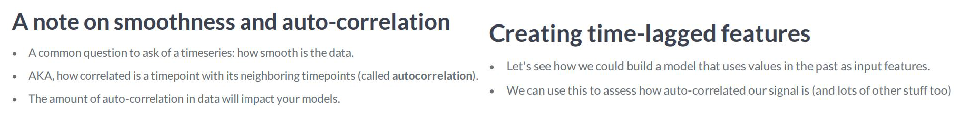

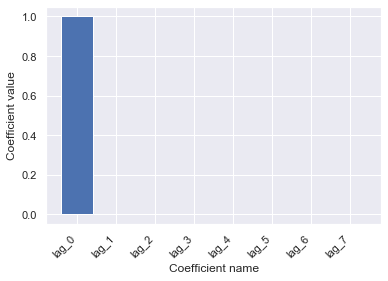

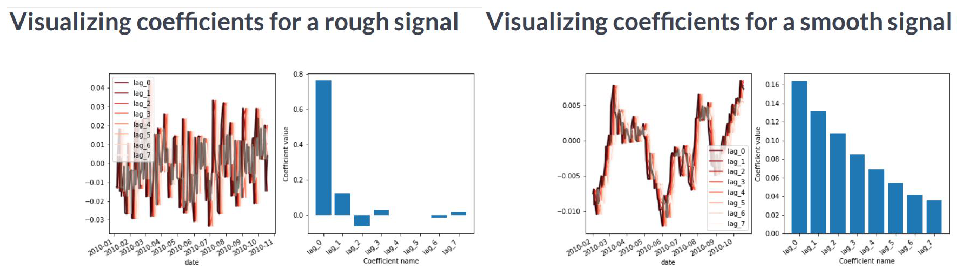

In [55]:
#vídeo

# The past is useful
plot_2('auto_correlation', 'time_lagged')

# Time-shifting data with Pandas
df.shift(3)

#####

# Creating a time-shifted DataFrame
shifts = [0, 1, 2, 3, 4, 5, 6, 7]

# Create a dictionary of time-shifted data
many_shifts = {'lag_{}'.format(ii): df['close'].dropna().shift(ii) for ii in shifts}

# Convert them into a dataframe
many_shifts = pd.DataFrame(many_shifts, index=df.index)

# Fitting a model with time-shifted features

# Fit the model using these input features
model = Ridge()
model.fit(many_shifts.replace(np.nan, 0), df['close'])

# Interpreting the auto-regressive model coefficients
# Visualize the fit model coefficients
fig, ax = plt.subplots()
ax.bar(many_shifts.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

plot_2('rough_sinal', 'smooth_signal')

Exercício 2

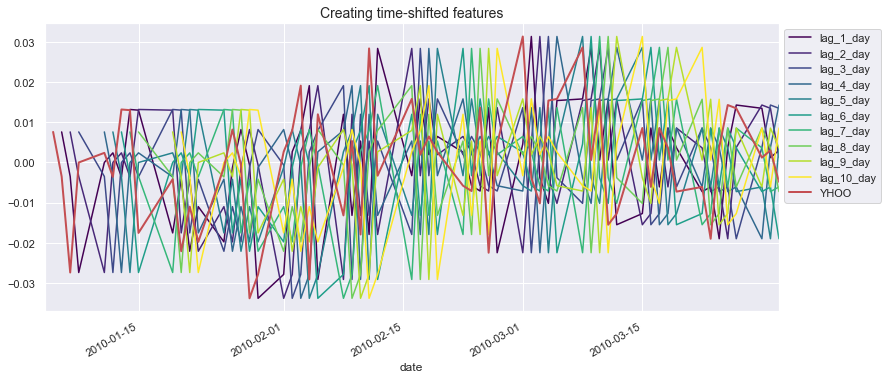

In [56]:
# Creating time-shifted features

# These are the "time lags"
shifts = np.arange(1, 11).astype(int)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): prices_perc['YHOO'].shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
prices_perc_shifted = pd.DataFrame(shifted_data, index=prices_perc.index)

# Plot the first 100 samples of each
ax = prices_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis)
prices_perc['YHOO'].iloc[:100].plot(color='r', lw=2)

plt.legend(bbox_to_anchor=(1, 1))
plt.title("""Creating time-shifted features""", fontsize=14)
plt.subplots_adjust(left=0, bottom=0, right=1.7, top=1, wspace=0, hspace=0)
plt.show()


Exercício 3

In [57]:
# Special case: Auto-regressive models

# Now that you've created time-shifted versions of a single time series, you can fit an auto-regressive model. This is a 
# regression model where the input features are time-shifted versions of the output time series data. You are using previous
# values of a timeseries to predict current values of the same timeseries (thus, it is auto-regressive).
#  - By investigating the coefficients of this model, you can explore any repetitive patterns that exist in a timeseries, 
# and get an idea for how far in the past a data point is predictive of the future.

# Replace missing values with the median for each column
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc['YHOO'].fillna(np.nanmedian(prices_perc))

# Fit the model
model = Ridge()
model.fit(X, y)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Exercício 4

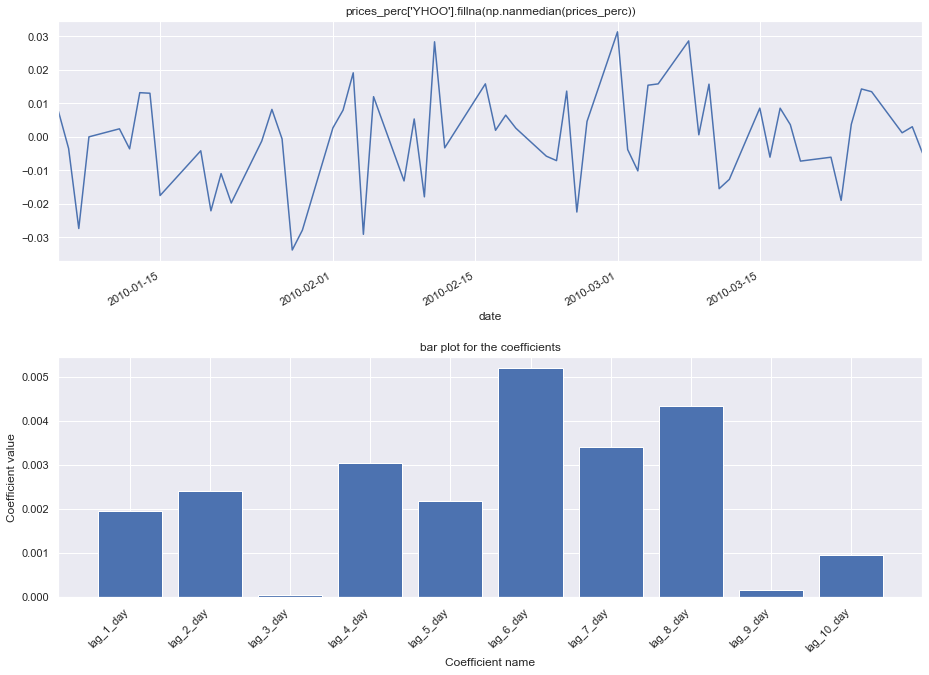

(aqui a conclusão foi diferente da do exerc.)
When you use time-lagged features on the raw data, you see that the highest coefficient is the 6th one. And a bit the 8th
and the 7h and the 4th. The others are not that useful.


In [58]:
# Visualize regression coefficients

# Now that you've fit the model, let's visualize its coefficients. This is an important part of machine learning because it 
# gives you an idea for how the different features of a model affect the outcome.
# In this exercise, you will create a function that, given a set of coefficients and feature names, visualizes the 
# coefficient values.

def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names, coefs)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    return ax

# Visualize the output data up to the end
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
y[1:].plot(ax=axs[0], title="prices_perc['YHOO'].fillna(np.nanmedian(prices_perc))")  # pus só dps do 1º pq era mt alto (2)

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, prices_perc_shifted.columns, ax=axs[1])
plt.title("bar plot for the coefficients")
plt.subplots_adjust(left=0, bottom=-0.6, right=1.2, top=1, wspace=0, hspace=0.4)
plt.show()

print("""(aqui a conclusão foi diferente da do exerc.)
When you use time-lagged features on the raw data, you see that the highest coefficient is the 6th one. And a bit the 8th
and the 7h and the 4th. The others are not that useful.""")

Exercício 5

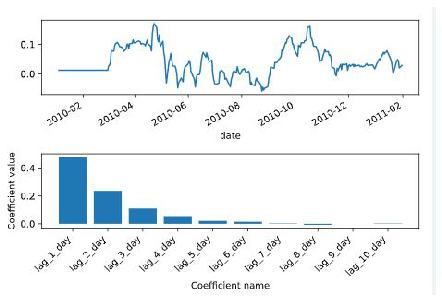

As you can see here, by transforming your data with a larger window, you've also changed the relationship between
each timepoint and the ones that come just before it. This model's coefficients gradually go down to zero, which means that 
the signal itself is smoother over time. Be careful when you see something like this, as it means your data is not i.i.d.



In [59]:
# Auto-regression with a smoother time series

# Now, let's re-run the same procedure using a smoother signal. You'll use the same percent change algorithm as before, but
# this time use a much larger window (40 instead of 20). As the window grows, the difference between neighboring timepoints
# gets smaller, resulting in a smoother signal. What do you think this will do to the auto-regressive model?
# prices_perc_shifted and model (updated to use a window of 40) are available in your workspace.

plot_1('resultados_ex_5')

print("""As you can see here, by transforming your data with a larger window, you've also changed the relationship between
each timepoint and the ones that come just before it. This model's coefficients gradually go down to zero, which means that 
the signal itself is smoother over time. Be careful when you see something like this, as it means your data is not i.i.d.
""")


#### Exercício 6 - Cross-validating time series data

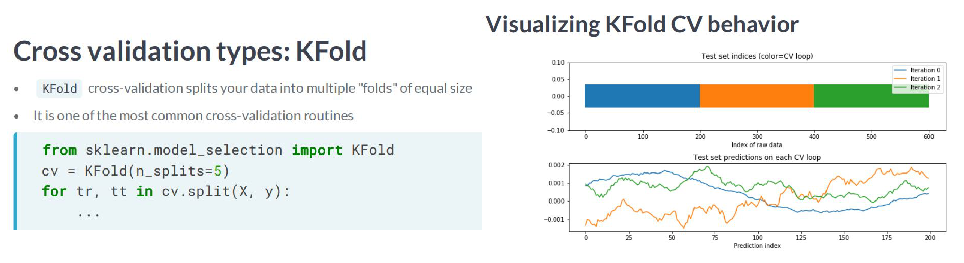

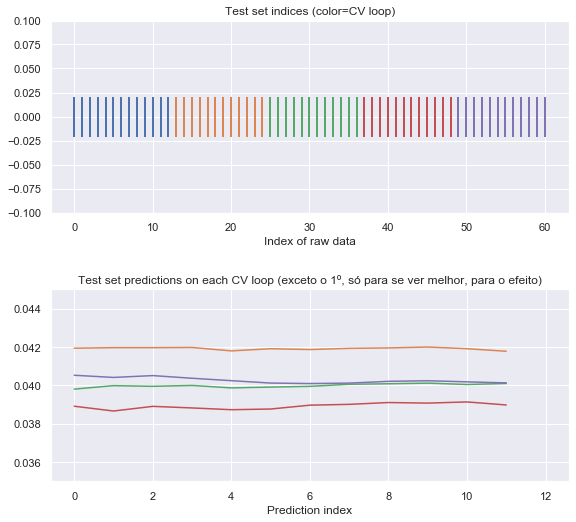

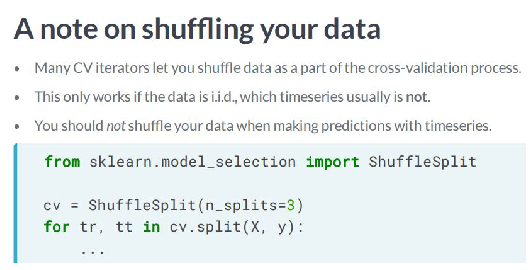

This only works ifthe data is i.i.d., which timeseries usually is not.
You should not shufe your data when making predictions with timeseries.

Visualizing shuffled CV behavior:


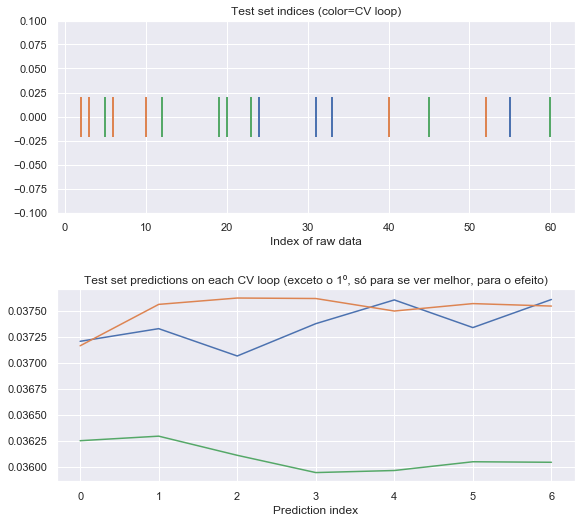

However, you generally should not use datapoints in the future to predict data in the past.
One approach: Always use training data from the past to predict the future.


In [60]:
import warnings
warnings.filterwarnings("ignore")
#vídeo

# Cross validation with scikit-learn

plot_2('kfold', 'visualizing_kfold')

from sklearn.model_selection import KFold

cv = KFold(n_splits=5)

# Iterating over the "split" method yields train/test indices
for tr, tt in cv.split(X, y):
    model.fit(X.iloc[tr], y.iloc[tr])
    model.score(X.iloc[tt], y.iloc[tt])

    # Visualizing model predictions
    plt.subplot(2, 1, 1)

    # Plot the indices chosen for validation on each loop
    plt.scatter(tt, [0] * len(tt), marker='_', s=2, lw=40)
    plt.ylim([-.1, .1])
    plt.title("Test set indices (color=CV loop)")
    plt.xlabel('Index of raw data')

    # Plot the model predictions on each iteration
    plt.subplot(2, 1, 2)
    plt.plot(model.predict(X.iloc[tt]))
    plt.title('Test set predictions on each CV loop (exceto o 1º, só para se ver melhor, para o efeito)')
    plt.ylim([0.035, 0.045])
    plt.xlabel('Prediction index')
    
plt.subplots_adjust(left=0, bottom=-0.6, right=1.2, top=1, wspace=0, hspace=0.4)
plt.show()

#####################################################################################################

plot_1('shuffling', right=1.2)
from sklearn.model_selection import ShuffleSplit

print("""This only works ifthe data is i.i.d., which timeseries usually is not.
You should not shufe your data when making predictions with timeseries.

Visualizing shuffled CV behavior:""")

cv = ShuffleSplit(n_splits=3)

for tr, tt in cv.split(X, y):
    model.fit(X.iloc[tr], y.iloc[tr])
    model.score(X.iloc[tt], y.iloc[tt])

    # Visualizing model predictions
    plt.subplot(2, 1, 1)
    plt.scatter(tt, [0] * len(tt), marker='_', s=2, lw=40)
    plt.ylim([-.1, .1])
    plt.title("Test set indices (color=CV loop)")
    plt.xlabel('Index of raw data')

    # Plot the model predictions on each iteration
    plt.subplot(2, 1, 2)
    plt.plot(model.predict(X.iloc[tt]))
    plt.title('Test set predictions on each CV loop (exceto o 1º, só para se ver melhor, para o efeito)')
    plt.xlabel('Prediction index')
    
plt.subplots_adjust(left=0, bottom=-0.6, right=1.2, top=1, wspace=0, hspace=0.4)
plt.show()

print("""However, you generally should not use datapoints in the future to predict data in the past.
One approach: Always use training data from the past to predict the future.""")

warnings.filterwarnings("always")

TimeSeriesSplit(max_train_size=None, n_splits=10)


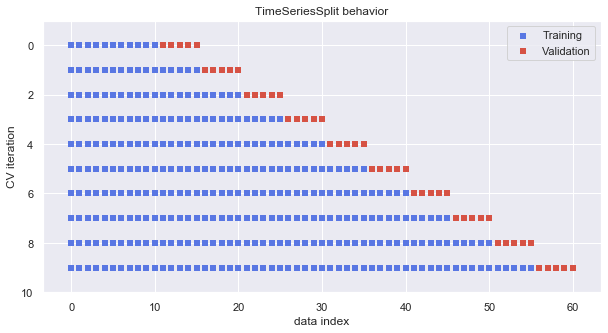

In [61]:
# Visualizing time series cross validation iterators

# Import and initialize the cross-validation iterator
from sklearn.model_selection import TimeSeriesSplit   # this always use data from the past

cv = TimeSeriesSplit(n_splits=10)
print(cv)

fig, ax = plt.subplots(figsize=(10, 5))
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot training and test indices
    l1 = ax.scatter(tr, [ii] * len(tr), c=[plt.cm.coolwarm(.1)], marker='_', lw=6)
    l2 = ax.scatter(tt, [ii] * len(tt), c=[plt.cm.coolwarm(.9)], marker='_', lw=6)
    ax.set(ylim=[10, -1], title='TimeSeriesSplit behavior', xlabel='data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])    

In [62]:
# Custom scoring functions in scikit-learn
def myfunction(estimator, X, y):
    y_pred = estimator.predict(X)
    my_custom_score = my_custom_function(y_pred, y)
    return my_custom_score


# A custom correlation function for scikit-learn
def my_pearsonr(est, X, y):
    # Generate predictions and convert to a vector
    y_pred = est.predict(X).squeeze()
    # Use the numpy "corrcoef" function to calculate a correlation matrix
    my_corrcoef_matrix = np.corrcoef(y_pred, y.squeeze())
    # Return a single correlation value from the matrix
    my_corrcoef = my_corrcoef[1, 0]
    return my_corrcoef


Exercício 7

Cross-validation WITH shuffling:


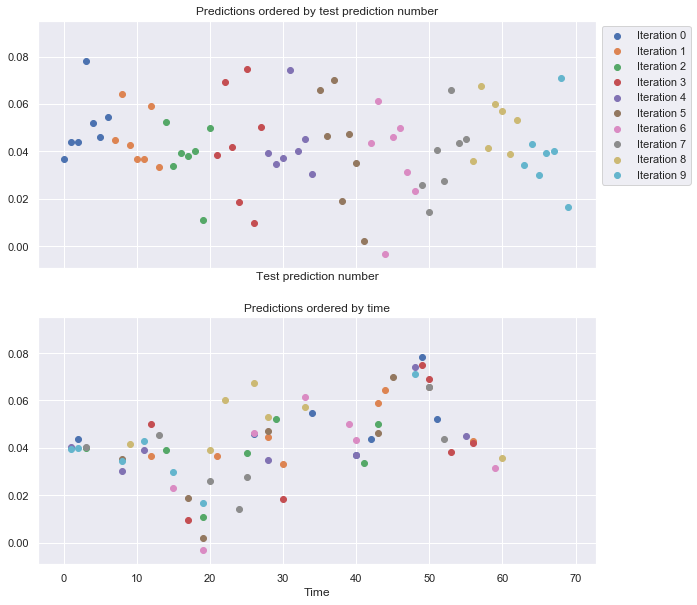

If you look at the plot, see that the order of datapoints in the test set is scrambled. 
Let's see how it looks when we shuffle the data in blocks.


In [63]:
# Cross-validation with shuffling

print("Cross-validation WITH shuffling:")

# As you'll recall, cross-validation is the process of splitting your data into training and test sets multiple times. 
# Each time you do this, you choose a different training and test set. In this exercise, you'll perform a traditional 
# ShuffleSplit cross-validation on the company value data from earlier. Later we'll cover what changes need to be made for 
# time series data. The data we'll use is the same historical price data for several large companies.
model = LinearRegression()

# Import ShuffleSplit and create the cross-validation object
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=1)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X.iloc[tr], y.iloc[tr])
    
    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X.iloc[tt])
    score = r2_score(y.iloc[tt], prediction)
    results.append((prediction, score, tt))

##########################################################################################
    
# Custom function to quickly visualize predictions
def visualize_predictions(results):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
    
    # Loop through our model results to visualize them
    for ii, (prediction, score, indices) in enumerate(results):
        # Plot the predictions of the model in the order they were generated
        offset = len(prediction) * ii
        axs[0].scatter(np.arange(len(prediction)) + offset, prediction, label='Iteration {}'.format(ii))
        
        # Plot the predictions of the model according to how time was ordered
        axs[1].scatter(indices, prediction)
    axs[0].legend(loc="best", bbox_to_anchor=(1, 1))
    axs[0].set(xlabel="Test prediction number", title="Predictions ordered by test prediction number")
    axs[1].set(xlabel="Time", title="Predictions ordered by time")
    plt.show()
    
visualize_predictions(results)

print("""If you look at the plot, see that the order of datapoints in the test set is scrambled. 
Let's see how it looks when we shuffle the data in blocks.""")

Exercício 8

Cross-validation WITHOUT shuffling:


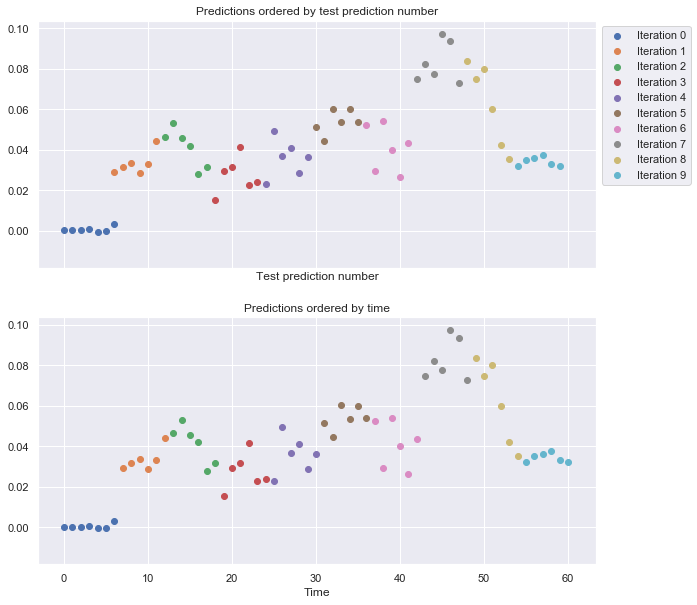

This time, the predictions generated within each CV loop look 'smoother' than they were before - they look more 
like a real time series because you didn't shuffle the data. This is a good sanity check to make sure your CV splits are 
correct.


In [64]:
# Cross-validation without shuffling

print("Cross-validation WITHOUT shuffling:")

# Create KFold cross-validation object
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=False)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X.iloc[tr], y.iloc[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(X.iloc[tt])
    score = r2_score(y.iloc[tt], prediction)
    results.append((prediction, score, tt))
    
# Custom function to quickly visualize predictions
visualize_predictions(results)

print("""This time, the predictions generated within each CV loop look 'smoother' than they were before - they look more 
like a real time series because you didn't shuffle the data. This is a good sanity check to make sure your CV splits are 
correct.""")

Exercício 9

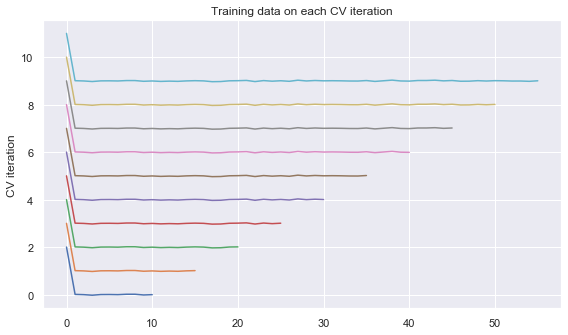

Note that the size of the training set grew each time when you used the time series cross-validation object. 
This way, the time points you predict are always after the timepoints we train on.


In [65]:
# Time-based cross-validation

# Finally, let's visualize the behavior of the time series cross-validation iterator in scikit-learn. Use this object to 
# iterate through your data one last time, visualizing the training data used to fit the model on each iteration.

# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits=10)

# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y[tr])

ax.set(title='Training data on each CV iteration', ylabel='CV iteration')

plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0.4)
plt.show()

print("""Note that the size of the training set grew each time when you used the time series cross-validation object. 
This way, the time points you predict are always after the timepoints we train on.""")

#### Exercício 10 - Stationarity and stability

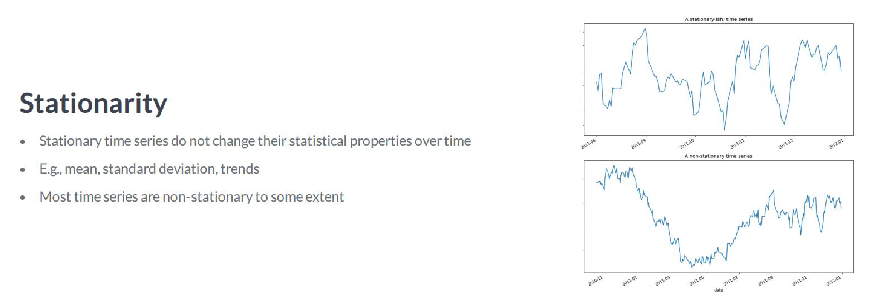

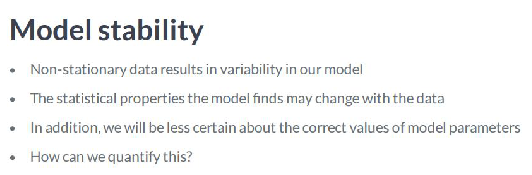

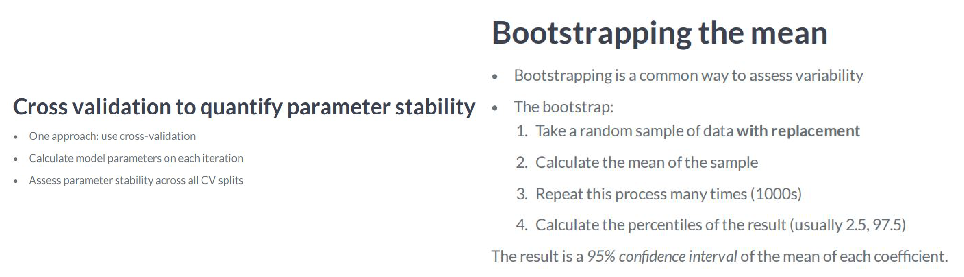

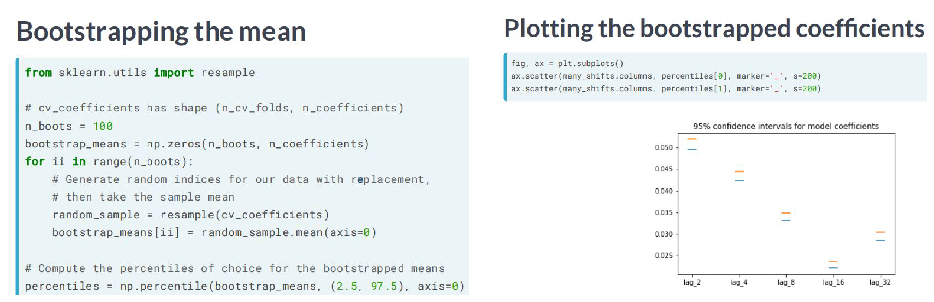

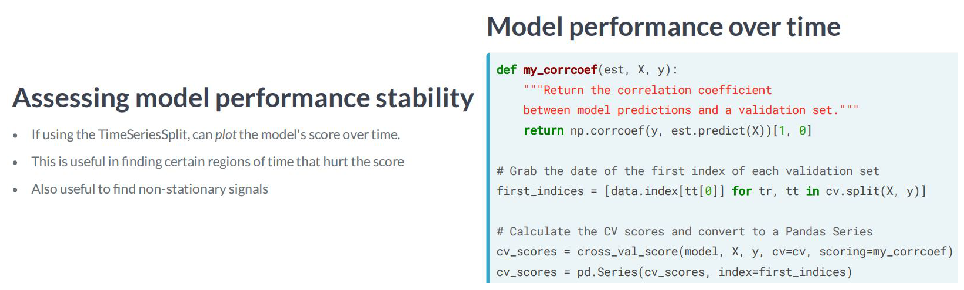

In [66]:
#vídeo

plot_2('stationarity', 'stationary_non_stationary')
print("=============================================================================================================")
plot_1('stability', right=1.2)
plot_2('cv_stability', 'bootstrapping_mean')
plot_2('bootstrapping_mean_code', 'boostrapping_coefficients_plot')
plot_2('assessing_stability', 'model_performance')

def my_corrcoef(est, X, y):
    """Return the correlation coefficient between model predictions and a validation set."""
    return np.corrcoef(y, est.predict(X))[1, 0]


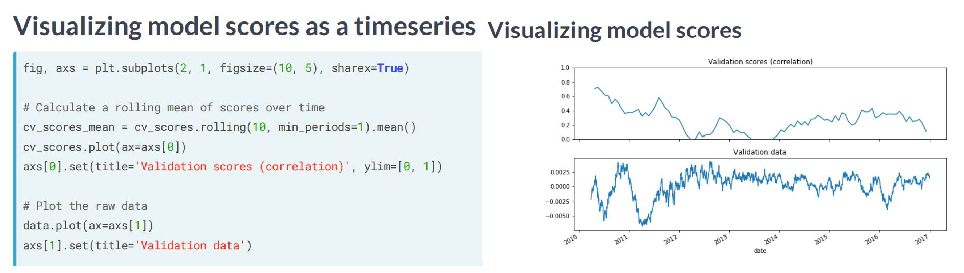

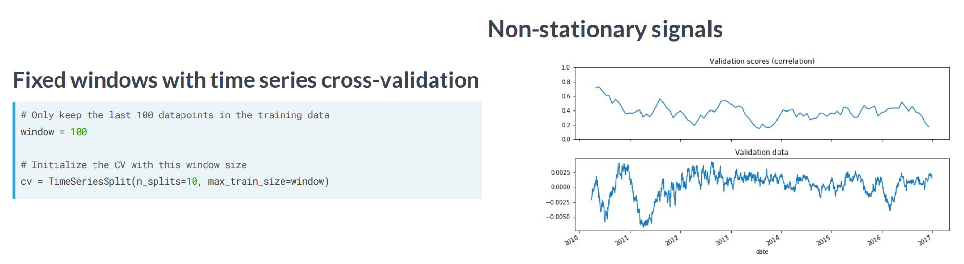

In [67]:
plot_2('1', '2')
plot_2('3', '4')

Exercício 11

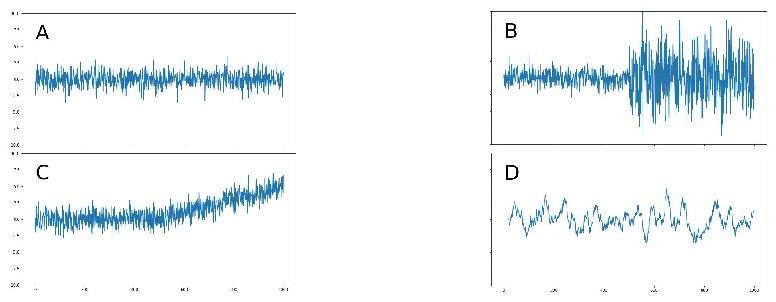

Non stationary: B and C.


In [68]:
# Stationarity

# First, let's confirm what we know about stationarity. Take a look at these time series.

# Which of the following time series do you think are NOT stationary?
plot_2('A_C', 'B_D')
print("""Non stationary: B and C.""")

Exercício 12

In [69]:
# Bootstrapping a confidence interval

# A useful tool for assessing the variability of some data is the bootstrap. In this exercise, you'll write your own 
# bootstrapping function that can be used to return a bootstrapped confidence interval.
# This function takes three parameters: a 2-D array of numbers (data), a list of percentiles to calculate (percentiles), 
# and the number of boostrap iterations to use (n_boots). It uses the resample function to generate a bootstrap sample,
# and then repeats this many times to calculate the confidence interval.

from sklearn.utils import resample

def bootstrap_interval(data, percentiles=(2.5, 97.5), n_boots=100):
    """Bootstrap a confidence interval for the mean of columns of a 2-D dataset."""
    # Create our empty array to fill the results
    bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    for ii in range(n_boots):
        # Generate random indices for our data *with* replacement, then take the sample mean
        random_sample = resample(data)
        bootstrap_means[ii] = random_sample.mean(axis=0)
        
    # Compute the percentiles of choice for the bootstrapped means
    percentiles = np.percentile(bootstrap_means, percentiles, axis=0)
    return percentiles


Exercício 13

In [70]:
# Calculating variability in model coefficients

# You'll re-run the cross-validation routine used before, but this time paying attention to the model's stability over time.
# You'll investigate the coefficients of the model, as well as the uncertainty in its predictions.
# Begin by assessing the stability (or uncertainty) of a model's coefficients across multiple CV splits. Remember, the
# coefficients are a reflection of the pattern that your model has found in the data.

# Iterate through CV splits
n_splits = 50
cv = TimeSeriesSplit(n_splits=n_splits)

# Create empty array to collect coefficients
coefficients = np.zeros([n_splits, X.shape[1]])

for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Fit the model on training data and collect the coefficients
    model.fit(X.iloc[tr], y.iloc[tr])
    coefficients[ii] = model.coef_

#####################################################################################################

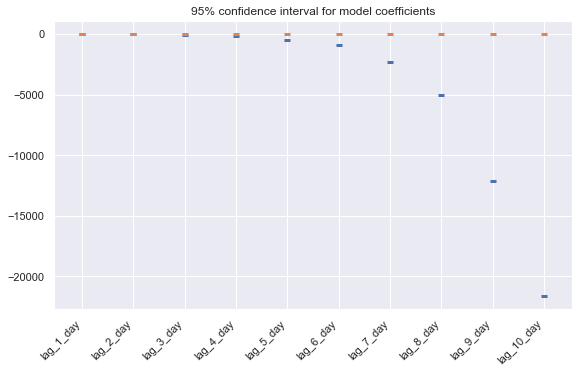

We calculated the variability around each coefficient, which helps assess which coefficients are more stable over
time!


In [71]:
feature_names = X.columns

# Calculate a confidence interval around each coefficient
bootstrapped_interval = bootstrap_interval(coefficients)

# Plot it
fig, ax = plt.subplots()
ax.scatter(feature_names, bootstrapped_interval[0], marker='_', lw=3)
ax.scatter(feature_names, bootstrapped_interval[1], marker='_', lw=3)
ax.set(title='95% confidence interval for model coefficients')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0.4)
plt.show()

print("""We calculated the variability around each coefficient, which helps assess which coefficients are more stable over
time!""")

Exercício 14

In [72]:
warnings.filterwarnings("ignore")
# Visualizing model score variability over time

from sklearn.model_selection import cross_val_score

def my_pearsonr(est, X, y):
    return np.corrcoef(est.predict(X).squeeze(), y.squeeze())[1, 0]

cv = TimeSeriesSplit(n_splits=50)
model = LinearRegression()
################################################################################################################

# Generate scores for each split to see how the model performs over time
scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)

times_scores = X.index[:len(scores)]

# Convert to a Pandas Series object
scores_series = pd.Series(scores, index=times_scores, name='score')

# Bootstrap a rolling confidence interval for the mean score
scores_lo = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=2.5))
scores_hi = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=97.5))

warnings.filterwarnings("always")

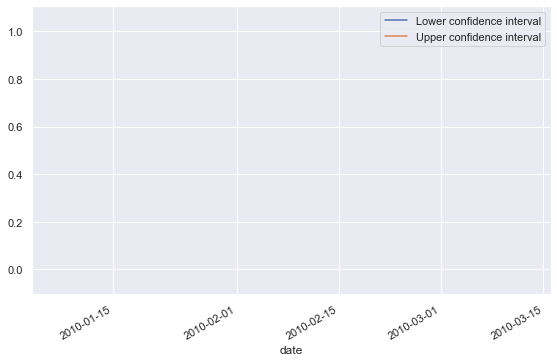

In [73]:
# Plot the results
fig, ax = plt.subplots()
scores_lo.plot(ax=ax, label="Lower confidence interval")
scores_hi.plot(ax=ax, label="Upper confidence interval")
ax.legend()

plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0.4)
plt.show()

# You plotted a rolling confidence interval for scores over time. This is useful in seeing when your model predictions are
# correct.

Exercício 15

In [74]:
%%script false
# Accounting for non-stationarity

# Pre-initialize window sizes
window_sizes = [25, 50, 75, 100]

# Create an empty DataFrame to collect the stores
all_scores = pd.DataFrame(index=times_scores)

# Generate scores for each split to see how the model performs over time
for window in window_sizes:
    # Create cross-validation object using a limited lookback window
    cv = TimeSeriesSplit(n_splits=100, max_train_size=window)
    
    # Calculate scores across all CV splits and collect them in a DataFrame
    this_scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)
    all_scores['Length {}'.format(window)] = this_scores

# Visualize the scores
ax = all_scores.rolling(10).mean().plot(cmap=plt.cm.coolwarm)
ax.set(title='Scores for multiple windows', ylabel='Correlation (r)')
plt.show()

Couldn't find program: 'false'


#### Exercício 16 - end

In [75]:
#vídeo

# Fim